### Panic Disorder Diagnosis

### Project Steps:

* Understanding the Causes of Heart Failure and identification of potential features
* Data Collection for features
* Data Validation & Cleaning
* Insights on Data (EDA)
* **Predictive Modeling Steps:**
    - Input(x) and Output(y) columns identification for predictive modeling
    - Feature engineering on x data (selecting important input features for modeling)
    - Dividing X, y data into training data (xtrain, ytrain) and testing data (xtest, ytest)
    - Handling missing values & outliers on xtrain, xtest data
    - Data Pre-Processing on xtrain and xtest data
        - converting categorical data into label encoding/onehot encoding
        - applying scaling on numerical data if necessary
    - Selecting predictive model algorithms based on y data type
    - Importing algorithm library and define model
    - Training model with xtrain , ytrain data
    - Testing model on xtest
        - get predictions(ypred) on xtest with trained model
    - Compare ypred with ytest values to check model performance
        - loss
        - performance
    - Check for different models with different algorithms
    - Select best model with less loss and high performance
    - Get real time predictions on unknowndata(xunknown) with best model

### 1. Analysis of Key Indicators and Prediction of Panic Disorder for a person.

When analyzing health of a person there comes so many factors into consideration whether they will directly or indirectly influence to the Disorder. In this we have taken a dataset to analyze and predict panic disorder have or not.

### 2. Data Collection for the Identified Features along with some other features

* Data Taken from Kaggle.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

**Reading CSv File**

In [2]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\foods\panic_disorder_dataset_training.csv")

#### Features:

Sl.No|Variable | Description
----------|--------------|---------------
1|Age|Age of the person
2|Gender|Gender of the person
3|Family History|Does the person has any faily history of panic disorder?
4|Personal History|Does the person has any previous panic disorder diagnosis?
5|Current Stressors|level of stress that the person has
6|Symptoms|symptoms of the panic disorder
7|Severity|Level of symptoms that the person has
8|Impact on life|Impact on the life due to current stressors
9|Demographics|Area in which person belongs
10|Medical History|Medical history of the person
11|Psychiatric History|kind of Psychiatric history does the person has
12|Substance Use|Does the person of habit of alochol or drugs
13|Coping Mechanism|mechnism does the person perform in order to deal with panic disorder
14|Social support|Level of social support that the person is getting 
15|Lifestyle Factors|Lifestyle factors that the person has

**Basic Checks**

In [3]:
data.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,None,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,None,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,None,None,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,None,Drugs,Seeking therapy,Low,Sleep quality,0


In [4]:
data.shape

(100000, 17)

In [5]:
for i in data.columns:
    try:
        data[i]=data[i].str.lower()
    except:
        continue

In [6]:
data.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,male,no,yes,moderate,shortness of breath,mild,mild,rural,diabetes,bipolar disorder,none,socializing,high,sleep quality,0
1,2,51,male,no,no,high,panic attacks,mild,mild,urban,asthma,anxiety disorder,drugs,exercise,high,sleep quality,0
2,3,32,female,yes,no,high,panic attacks,mild,significant,urban,diabetes,depressive disorder,none,seeking therapy,moderate,exercise,0
3,4,64,female,no,no,moderate,chest pain,moderate,moderate,rural,diabetes,none,none,meditation,high,exercise,0
4,5,31,male,yes,no,moderate,panic attacks,mild,moderate,rural,asthma,none,drugs,seeking therapy,low,sleep quality,0


In [7]:
data[data.duplicated()]

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis


In [8]:
data.dtypes

Participant ID               int64
Age                          int64
Gender                      object
Family History              object
Personal History            object
Current Stressors           object
Symptoms                    object
Severity                    object
Impact on Life              object
Demographics                object
Medical History             object
Psychiatric History         object
Substance Use               object
Coping Mechanisms           object
Social Support              object
Lifestyle Factors           object
Panic Disorder Diagnosis     int64
dtype: object

In [9]:
data.isnull().sum()

Participant ID              0
Age                         0
Gender                      0
Family History              0
Personal History            0
Current Stressors           0
Symptoms                    0
Severity                    0
Impact on Life              0
Demographics                0
Medical History             0
Psychiatric History         0
Substance Use               0
Coping Mechanisms           0
Social Support              0
Lifestyle Factors           0
Panic Disorder Diagnosis    0
dtype: int64

In [10]:
data.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,male,no,yes,moderate,shortness of breath,mild,mild,rural,diabetes,bipolar disorder,none,socializing,high,sleep quality,0
1,2,51,male,no,no,high,panic attacks,mild,mild,urban,asthma,anxiety disorder,drugs,exercise,high,sleep quality,0
2,3,32,female,yes,no,high,panic attacks,mild,significant,urban,diabetes,depressive disorder,none,seeking therapy,moderate,exercise,0
3,4,64,female,no,no,moderate,chest pain,moderate,moderate,rural,diabetes,none,none,meditation,high,exercise,0
4,5,31,male,yes,no,moderate,panic attacks,mild,moderate,rural,asthma,none,drugs,seeking therapy,low,sleep quality,0


In [11]:
data['Current Stressors'].unique()

array(['moderate', 'high', 'low'], dtype=object)

In [12]:
data['Symptoms'].unique()

array(['shortness of breath', 'panic attacks', 'chest pain', 'dizziness',
       'fear of losing control'], dtype=object)

In [13]:
data['Symptoms']=data['Symptoms'].str.replace(" ","_")

In [14]:
data['Severity'].unique()

array(['mild', 'moderate', 'severe'], dtype=object)

In [15]:
data['Impact on Life'].unique()

array(['mild', 'significant', 'moderate'], dtype=object)

In [16]:
data['Demographics'].unique()

array(['rural', 'urban'], dtype=object)

In [17]:
data['Medical History'].unique()

array(['diabetes', 'asthma', 'none', 'heart disease'], dtype=object)

In [18]:
data['Medical History']=data['Medical History'].str.replace(" ","_")

In [19]:
data['Psychiatric History'].unique()

array(['bipolar disorder', 'anxiety disorder', 'depressive disorder',
       'none'], dtype=object)

In [20]:
data['Psychiatric History']=data['Psychiatric History'].str.replace(" ","_")

In [21]:
data['Substance Use'].unique()

array(['none', 'drugs', 'alcohol'], dtype=object)

In [22]:
data['Coping Mechanisms'].unique()

array(['socializing', 'exercise', 'seeking therapy', 'meditation'],
      dtype=object)

In [23]:
data['Coping Mechanisms']=data['Coping Mechanisms'].str.replace(" ","_")

In [24]:
data['Social Support'].unique()

array(['high', 'moderate', 'low'], dtype=object)

In [25]:
data['Lifestyle Factors'].unique()

array(['sleep quality', 'exercise', 'diet'], dtype=object)

In [26]:
data['Lifestyle Factors']=data['Lifestyle Factors'].str.replace(" ","_")

In [27]:
data=data.drop('Participant ID',axis=1)

In [28]:
data.head()

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,38,male,no,yes,moderate,shortness_of_breath,mild,mild,rural,diabetes,bipolar_disorder,none,socializing,high,sleep_quality,0
1,51,male,no,no,high,panic_attacks,mild,mild,urban,asthma,anxiety_disorder,drugs,exercise,high,sleep_quality,0
2,32,female,yes,no,high,panic_attacks,mild,significant,urban,diabetes,depressive_disorder,none,seeking_therapy,moderate,exercise,0
3,64,female,no,no,moderate,chest_pain,moderate,moderate,rural,diabetes,none,none,meditation,high,exercise,0
4,31,male,yes,no,moderate,panic_attacks,mild,moderate,rural,asthma,none,drugs,seeking_therapy,low,sleep_quality,0


**EDA**

In [29]:
data.head(2)

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,38,male,no,yes,moderate,shortness_of_breath,mild,mild,rural,diabetes,bipolar_disorder,none,socializing,high,sleep_quality,0
1,51,male,no,no,high,panic_attacks,mild,mild,urban,asthma,anxiety_disorder,drugs,exercise,high,sleep_quality,0


**Univariate Analysis**


Numerical Column: Age
Uni-Variate Descriptive Stats:
count    100000.0
mean         41.0
std          14.0
min          18.0
25%          29.0
50%          41.0
75%          53.0
max          65.0
Name: Age, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.0006280051439739706 , -1.196425583470949

Visual Analysis:
-----------------------------------------------------


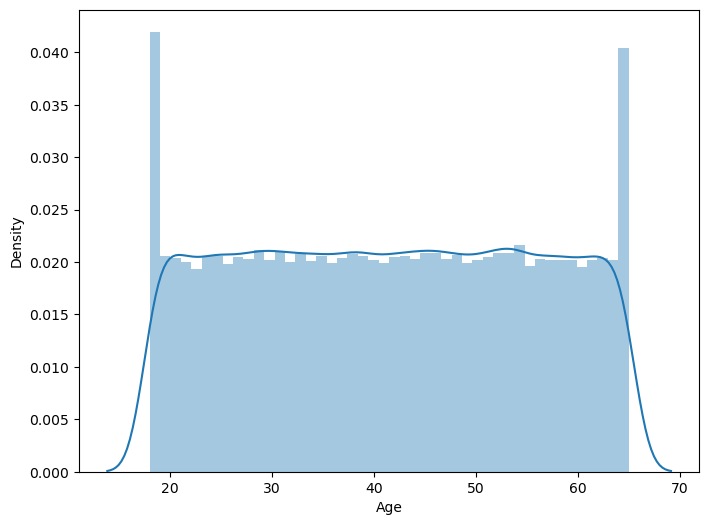


Categorical Column: Gender
Uni-Variate Descriptive Stats:
Classes: ['male' 'female']
Number of Classes: 2
Class Percent:
male      50.052
female    49.948
Name: Gender, dtype: float64
---------------------------------------------------
Mode Value: male

Visual Analysis:
-----------------------------------------------------


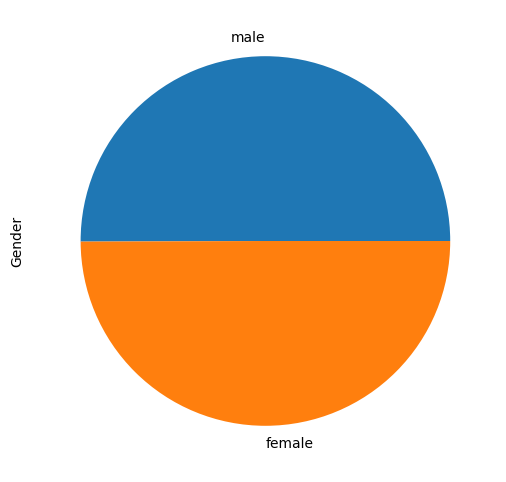


Categorical Column: Family History
Uni-Variate Descriptive Stats:
Classes: ['no' 'yes']
Number of Classes: 2
Class Percent:
yes    50.042
no     49.958
Name: Family History, dtype: float64
---------------------------------------------------
Mode Value: yes

Visual Analysis:
-----------------------------------------------------


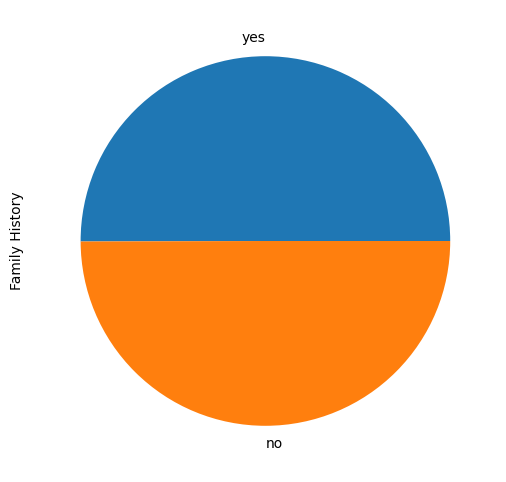


Categorical Column: Personal History
Uni-Variate Descriptive Stats:
Classes: ['yes' 'no']
Number of Classes: 2
Class Percent:
no     50.21
yes    49.79
Name: Personal History, dtype: float64
---------------------------------------------------
Mode Value: no

Visual Analysis:
-----------------------------------------------------


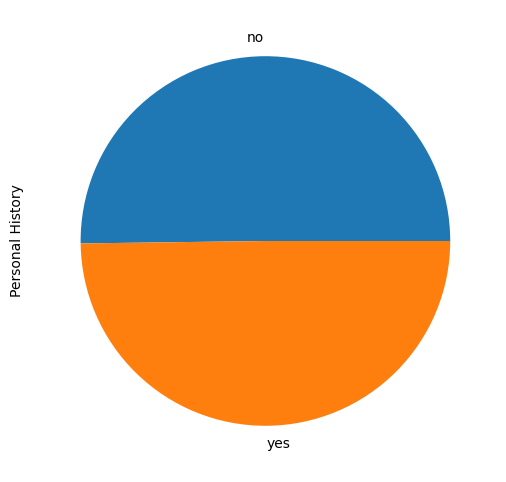


Categorical Column: Current Stressors
Uni-Variate Descriptive Stats:
Classes: ['moderate' 'high' 'low']
Number of Classes: 3
Class Percent:
low         33.409
high        33.369
moderate    33.222
Name: Current Stressors, dtype: float64
---------------------------------------------------
Mode Value: low

Visual Analysis:
-----------------------------------------------------


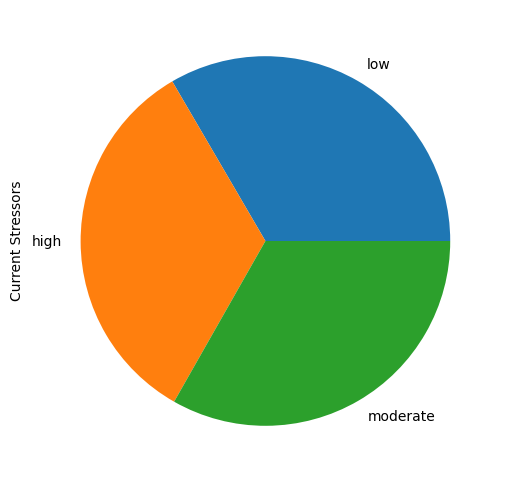


Categorical Column: Symptoms
Uni-Variate Descriptive Stats:
Classes: ['shortness_of_breath' 'panic_attacks' 'chest_pain' 'dizziness'
 'fear_of_losing_control']
Number of Classes: 5
Class Percent:
fear_of_losing_control    20.236
dizziness                 20.138
shortness_of_breath       19.949
chest_pain                19.893
panic_attacks             19.784
Name: Symptoms, dtype: float64
---------------------------------------------------
Mode Value: fear_of_losing_control

Visual Analysis:
-----------------------------------------------------


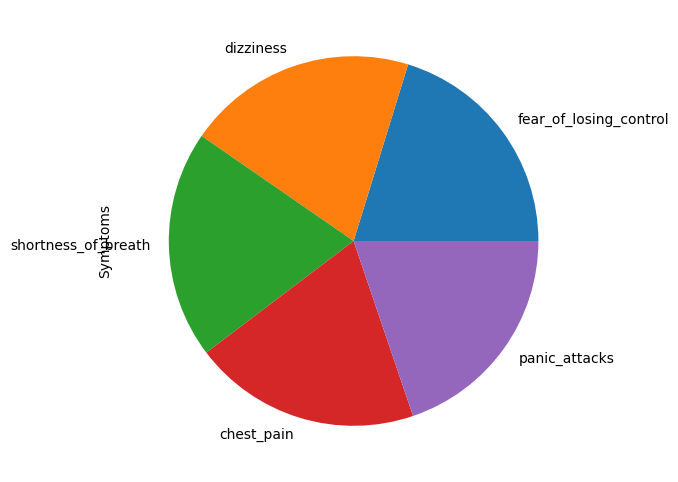


Categorical Column: Severity
Uni-Variate Descriptive Stats:
Classes: ['mild' 'moderate' 'severe']
Number of Classes: 3
Class Percent:
severe      33.510
mild        33.365
moderate    33.125
Name: Severity, dtype: float64
---------------------------------------------------
Mode Value: severe

Visual Analysis:
-----------------------------------------------------


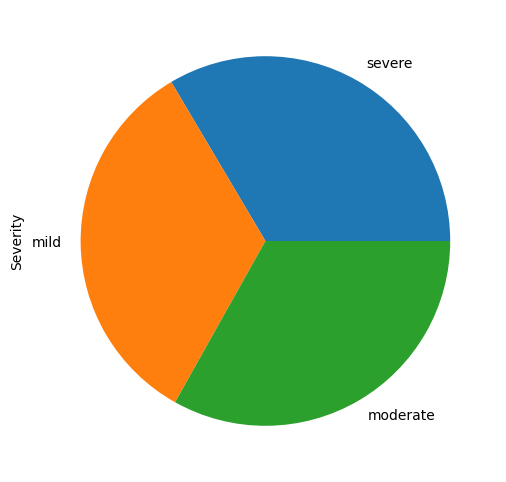


Categorical Column: Impact on Life
Uni-Variate Descriptive Stats:
Classes: ['mild' 'significant' 'moderate']
Number of Classes: 3
Class Percent:
mild           33.452
moderate       33.333
significant    33.215
Name: Impact on Life, dtype: float64
---------------------------------------------------
Mode Value: mild

Visual Analysis:
-----------------------------------------------------


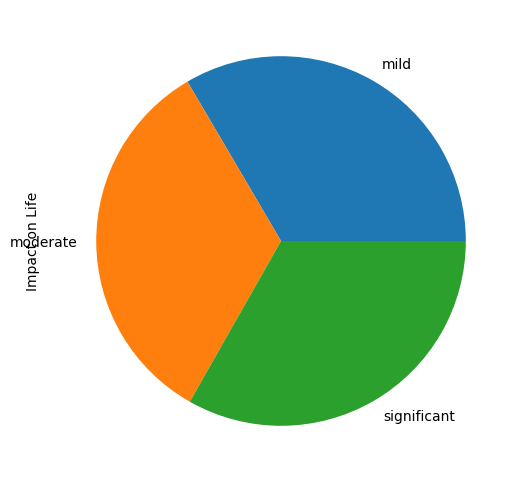


Categorical Column: Demographics
Uni-Variate Descriptive Stats:
Classes: ['rural' 'urban']
Number of Classes: 2
Class Percent:
rural    50.087
urban    49.913
Name: Demographics, dtype: float64
---------------------------------------------------
Mode Value: rural

Visual Analysis:
-----------------------------------------------------


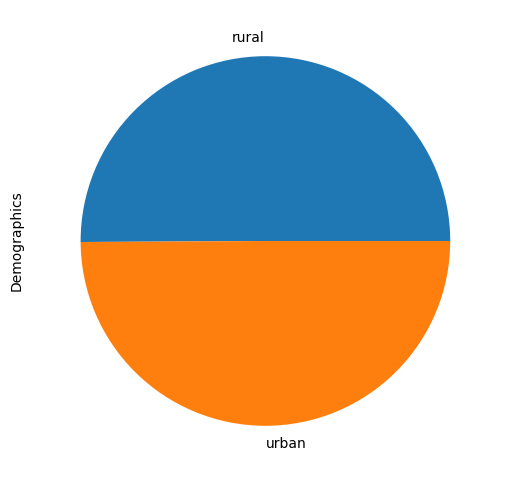


Categorical Column: Medical History
Uni-Variate Descriptive Stats:
Classes: ['diabetes' 'asthma' 'none' 'heart_disease']
Number of Classes: 4
Class Percent:
none             25.173
diabetes         25.074
heart_disease    24.993
asthma           24.760
Name: Medical History, dtype: float64
---------------------------------------------------
Mode Value: none

Visual Analysis:
-----------------------------------------------------


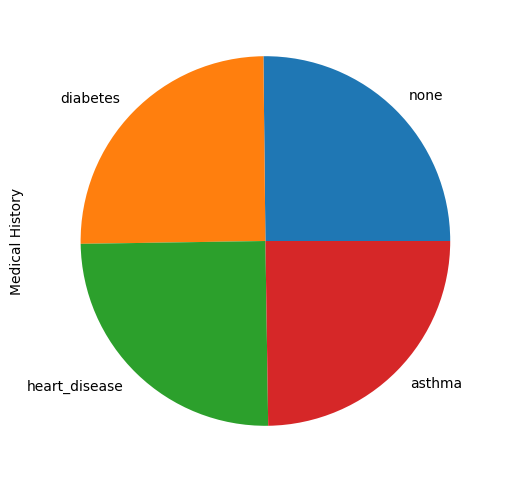


Categorical Column: Psychiatric History
Uni-Variate Descriptive Stats:
Classes: ['bipolar_disorder' 'anxiety_disorder' 'depressive_disorder' 'none']
Number of Classes: 4
Class Percent:
bipolar_disorder       25.058
anxiety_disorder       25.025
depressive_disorder    24.996
none                   24.921
Name: Psychiatric History, dtype: float64
---------------------------------------------------
Mode Value: bipolar_disorder

Visual Analysis:
-----------------------------------------------------


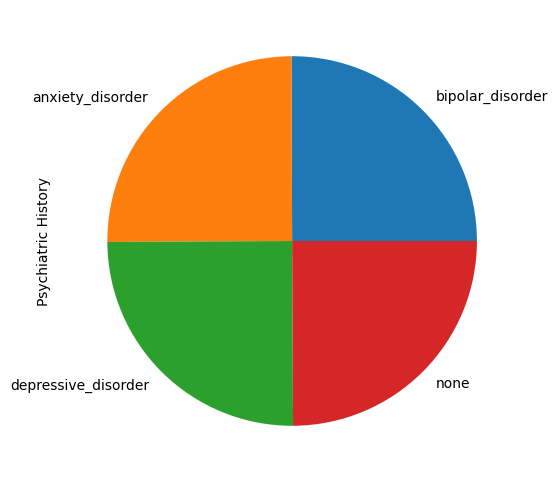


Categorical Column: Substance Use
Uni-Variate Descriptive Stats:
Classes: ['none' 'drugs' 'alcohol']
Number of Classes: 3
Class Percent:
alcohol    33.445
none       33.374
drugs      33.181
Name: Substance Use, dtype: float64
---------------------------------------------------
Mode Value: alcohol

Visual Analysis:
-----------------------------------------------------


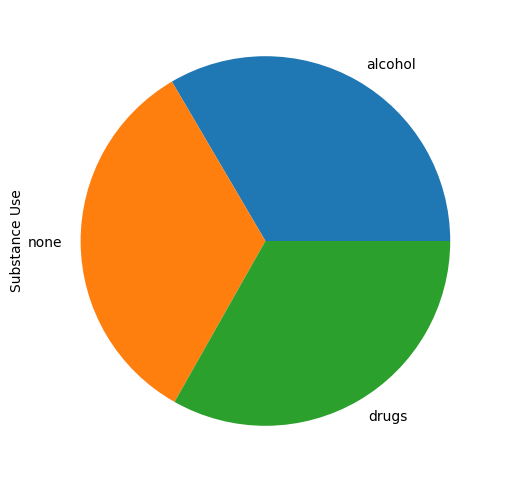


Categorical Column: Coping Mechanisms
Uni-Variate Descriptive Stats:
Classes: ['socializing' 'exercise' 'seeking_therapy' 'meditation']
Number of Classes: 4
Class Percent:
socializing        25.197
meditation         25.037
seeking_therapy    24.925
exercise           24.841
Name: Coping Mechanisms, dtype: float64
---------------------------------------------------
Mode Value: socializing

Visual Analysis:
-----------------------------------------------------


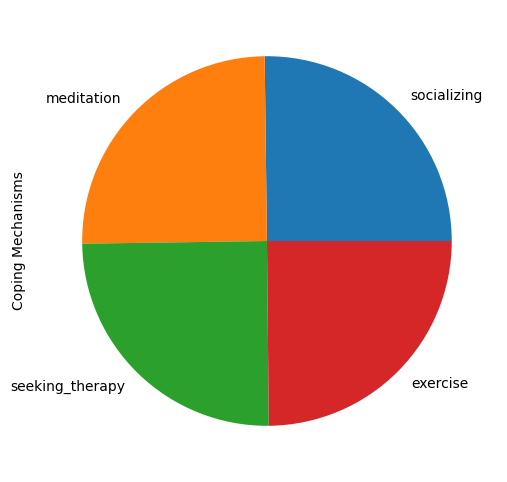


Categorical Column: Social Support
Uni-Variate Descriptive Stats:
Classes: ['high' 'moderate' 'low']
Number of Classes: 3
Class Percent:
high        33.453
moderate    33.353
low         33.194
Name: Social Support, dtype: float64
---------------------------------------------------
Mode Value: high

Visual Analysis:
-----------------------------------------------------


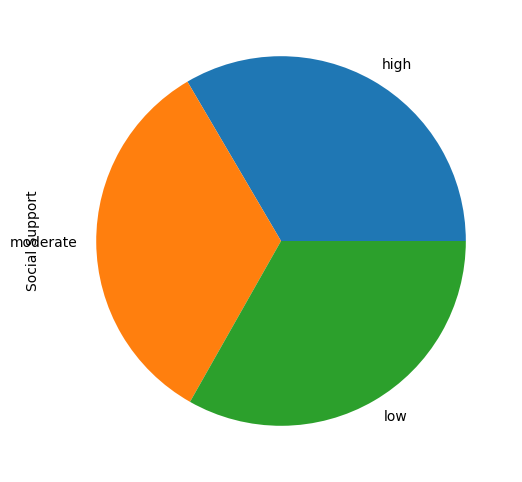


Categorical Column: Lifestyle Factors
Uni-Variate Descriptive Stats:
Classes: ['sleep_quality' 'exercise' 'diet']
Number of Classes: 3
Class Percent:
exercise         33.597
diet             33.331
sleep_quality    33.072
Name: Lifestyle Factors, dtype: float64
---------------------------------------------------
Mode Value: exercise

Visual Analysis:
-----------------------------------------------------


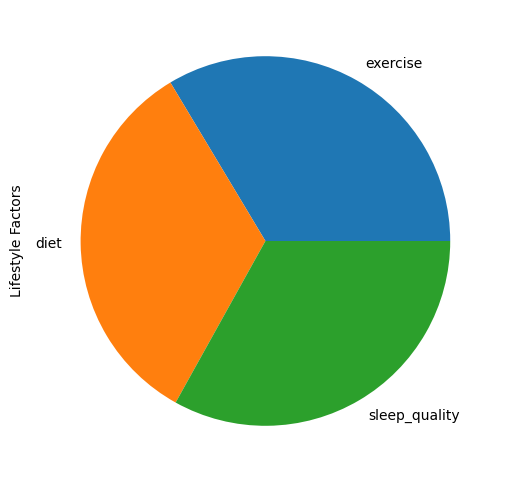


Numerical Column: Panic Disorder Diagnosis
Uni-Variate Descriptive Stats:
count    100000.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: Panic Disorder Diagnosis, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 4.514709588572077 , 18.3829703281513

Visual Analysis:
-----------------------------------------------------


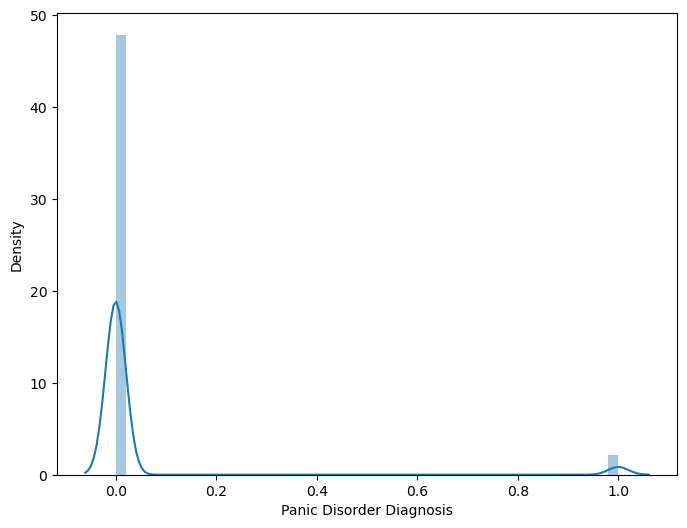

In [30]:
from simple_colors import *

for i in data.columns:
    if data[i].dtype == 'object':
        print()
        print(green("Categorical Column:",['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:",['bold']))
        print(black("Classes:", ['bold']), data[i].unique())
        print(black("Number of Classes:",['bold']), data[i].nunique())
        print(black('Class Percent:',['bold']))
        print((data[i].value_counts()/data[i].value_counts().sum())*100)
        print("---------------------------------------------------")
        print(black("Mode Value:",['bold']), data[i].mode()[0])
        if i!='Amenities_Cleaned' and i!='Flooring':
            print()
            print(magenta("Visual Analysis:",['bold']))
            print("-----------------------------------------------------")
            plt.figure(figsize = (8,6))
            data[i].value_counts().plot(kind = 'pie')
            plt.show()        
        
    elif data[i].dtype != 'object':
        print()
        print(blue("Numerical Column:",['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:",['bold']))
        print(round(data[i].describe(),))
        print("-----------------------------------------------------")
        print(black("Skewness & Kurtosis:",['bold']), data[i].skew(), ",", data[i].kurt())
        print()
        print(cyan("Visual Analysis:",['bold']))
        print("-----------------------------------------------------")
        plt.figure(figsize = (8,6))
        sns.distplot(data[i])
        #data[i].plot(kind = 'density')
        plt.show()

**Uni-Variate Insights**

* class balance in Categorical Columns.
* Most of the columns are Categorical.
* No outliers Persent in numeric data

In [31]:
data.dtypes

Age                          int64
Gender                      object
Family History              object
Personal History            object
Current Stressors           object
Symptoms                    object
Severity                    object
Impact on Life              object
Demographics                object
Medical History             object
Psychiatric History         object
Substance Use               object
Coping Mechanisms           object
Social Support              object
Lifestyle Factors           object
Panic Disorder Diagnosis     int64
dtype: object

In [32]:
data.head()

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,38,male,no,yes,moderate,shortness_of_breath,mild,mild,rural,diabetes,bipolar_disorder,none,socializing,high,sleep_quality,0
1,51,male,no,no,high,panic_attacks,mild,mild,urban,asthma,anxiety_disorder,drugs,exercise,high,sleep_quality,0
2,32,female,yes,no,high,panic_attacks,mild,significant,urban,diabetes,depressive_disorder,none,seeking_therapy,moderate,exercise,0
3,64,female,no,no,moderate,chest_pain,moderate,moderate,rural,diabetes,none,none,meditation,high,exercise,0
4,31,male,yes,no,moderate,panic_attacks,mild,moderate,rural,asthma,none,drugs,seeking_therapy,low,sleep_quality,0


**Bi-Variate Analysis**

<AxesSubplot:xlabel='Panic Disorder Diagnosis', ylabel='Personal History'>

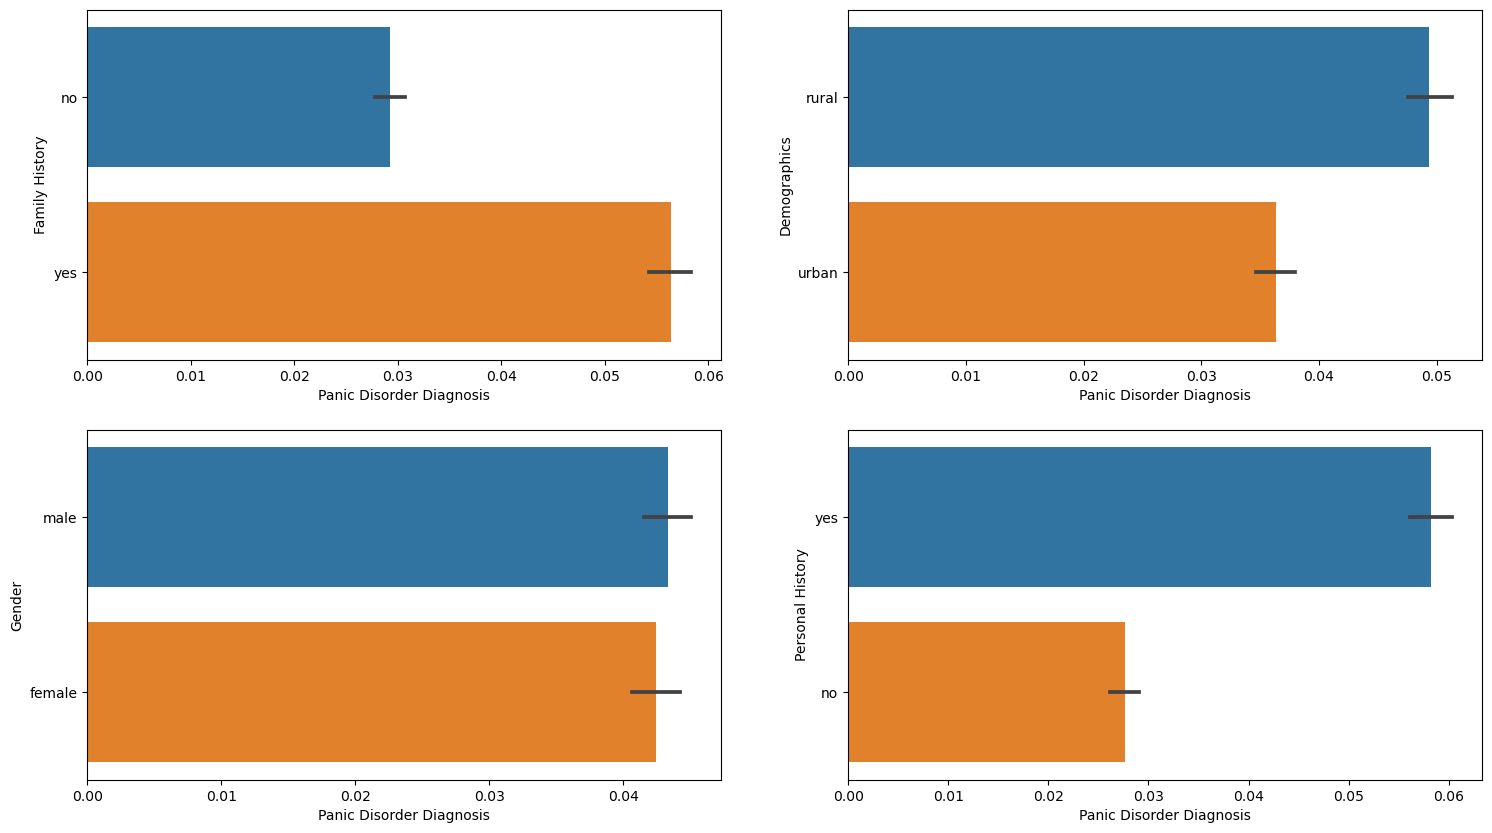

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10)) 
sns.barplot(ax=axes[0, 0], data = data, x = 'Panic Disorder Diagnosis', y = 'Family History')
sns.barplot(ax=axes[0, 1], data = data, x = 'Panic Disorder Diagnosis', y = 'Demographics')
sns.barplot(ax=axes[1, 0], data = data, x = 'Panic Disorder Diagnosis', y = 'Gender')
sns.barplot(ax=axes[1, 1], data = data, x = 'Panic Disorder Diagnosis', y='Personal History')

* People with Family History has high chances of getting panic disorder
* people in Rural Areas has high chances of getting panic disorder.
* Male and Female has equal chance of getting Panic disorder.
* People with personal disorder has high chances of getting panic disorder.

In [34]:
data['Age_group']=pd.cut(data.Age,bins=[0,20,40,60,80],right=True,labels=['0-20','20-40','40-60','60-80'])

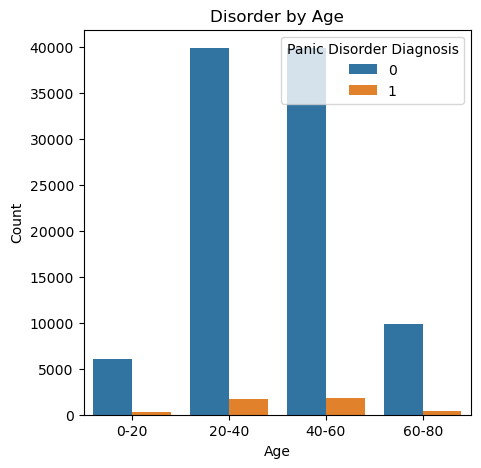

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(x='Age_group',hue='Panic Disorder Diagnosis',data=data)
plt.title("Disorder by Age")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

people with 20-60 Age have high chances of getting panic disorder.

<AxesSubplot:xlabel='Coping Mechanisms', ylabel='count'>

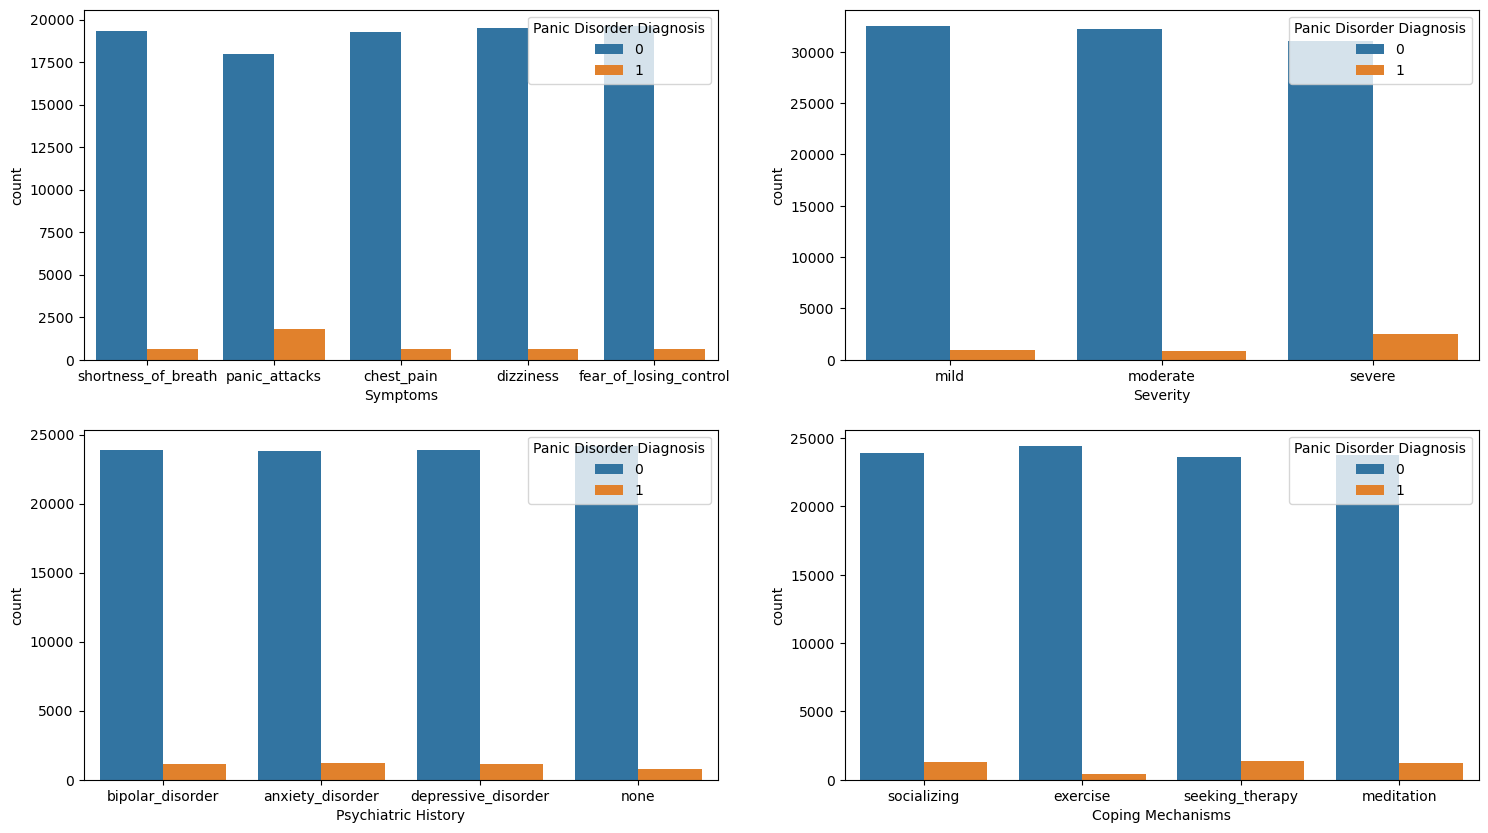

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10)) 
sns.countplot(ax=axes[0, 0], data = data, hue = 'Panic Disorder Diagnosis', x = 'Symptoms')
sns.countplot(ax=axes[0, 1], data = data, hue = 'Panic Disorder Diagnosis', x = 'Severity')
sns.countplot(ax=axes[1, 0], data = data, hue= 'Panic Disorder Diagnosis', x = 'Psychiatric History')
sns.countplot(ax=axes[1, 1], data = data, hue = 'Panic Disorder Diagnosis', x='Coping Mechanisms')

* people with Panic attack has high chances of getting panic disorder.
* people with mild,moderate symptoms has less chances of getting panic disorder.
* people with no Psychiatric history has less chances of getting panic disorder.
* People who includes coping mechanism as exercise has less chances of getting panic disorder.

**Multi Variate Insights**

In [37]:
data.head()

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis,Age_group
0,38,male,no,yes,moderate,shortness_of_breath,mild,mild,rural,diabetes,bipolar_disorder,none,socializing,high,sleep_quality,0,20-40
1,51,male,no,no,high,panic_attacks,mild,mild,urban,asthma,anxiety_disorder,drugs,exercise,high,sleep_quality,0,40-60
2,32,female,yes,no,high,panic_attacks,mild,significant,urban,diabetes,depressive_disorder,none,seeking_therapy,moderate,exercise,0,20-40
3,64,female,no,no,moderate,chest_pain,moderate,moderate,rural,diabetes,none,none,meditation,high,exercise,0,60-80
4,31,male,yes,no,moderate,panic_attacks,mild,moderate,rural,asthma,none,drugs,seeking_therapy,low,sleep_quality,0,20-40


<AxesSubplot:xlabel='Gender', ylabel='Panic Disorder Diagnosis'>

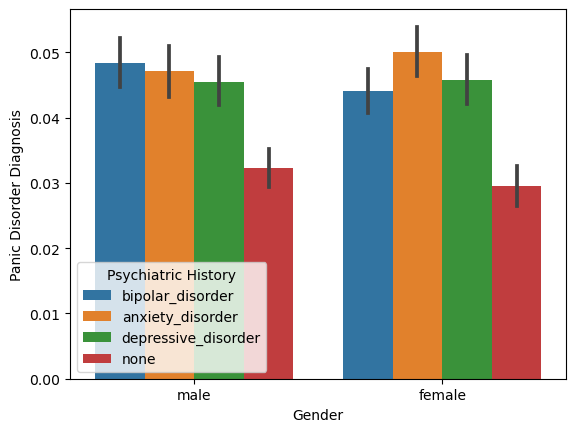

In [38]:
sns.barplot(x='Gender',y='Panic Disorder Diagnosis',data=data,hue='Psychiatric History')

* In males ,The persons with bipolar_disorder has high chsnce of getting panic disorder.
* In Females, The persons with anxiety disorder has a high chance of getting panic disorder.

In [39]:
data.groupby(["Gender",'Psychiatric History'])['Panic Disorder Diagnosis'].mean()

Gender  Psychiatric History
female  anxiety_disorder       0.050012
        bipolar_disorder       0.044011
        depressive_disorder    0.045837
        none                   0.029517
male    anxiety_disorder       0.047095
        bipolar_disorder       0.048427
        depressive_disorder    0.045455
        none                   0.032322
Name: Panic Disorder Diagnosis, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Panic Disorder Diagnosis'>

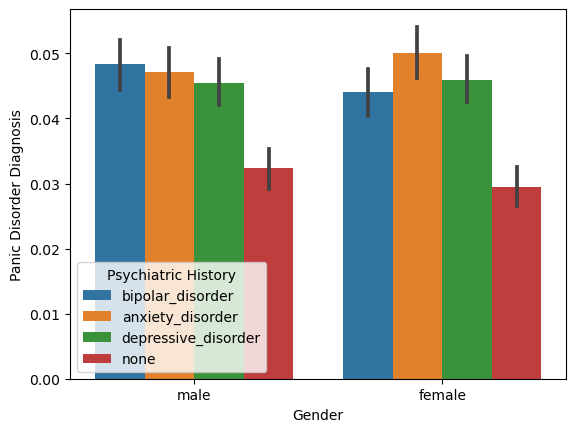

In [40]:
sns.barplot(x='Gender',y='Panic Disorder Diagnosis',data=data,hue='Psychiatric History')

In [41]:
data.groupby(["Symptoms",'Age'])['Panic Disorder Diagnosis'].mean()

Symptoms             Age
chest_pain           18     0.035885
                     19     0.032258
                     20     0.032941
                     21     0.037688
                     22     0.017241
                              ...   
shortness_of_breath  61     0.024510
                     62     0.064904
                     63     0.036036
                     64     0.030952
                     65     0.023148
Name: Panic Disorder Diagnosis, Length: 240, dtype: float64

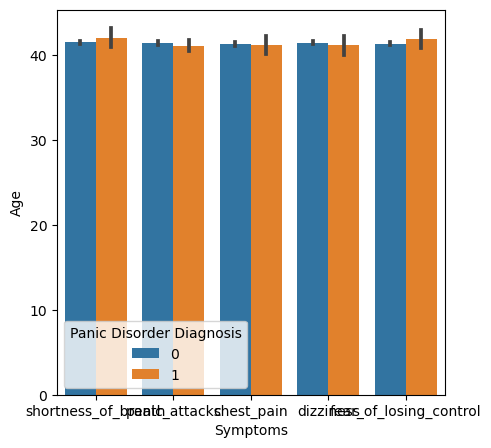

In [42]:
plt.figure(figsize=(5,5))
sns.barplot(x='Symptoms',y='Age',data=data,hue='Panic Disorder Diagnosis')
plt.show()

Almost all the symptoms have the equal importance

In [43]:
data.groupby(['Demographics','Substance Use'])['Panic Disorder Diagnosis'].mean()

Demographics  Substance Use
rural         alcohol          0.053808
              drugs            0.054765
              none             0.039502
urban         alcohol          0.040134
              drugs            0.039388
              none             0.029461
Name: Panic Disorder Diagnosis, dtype: float64

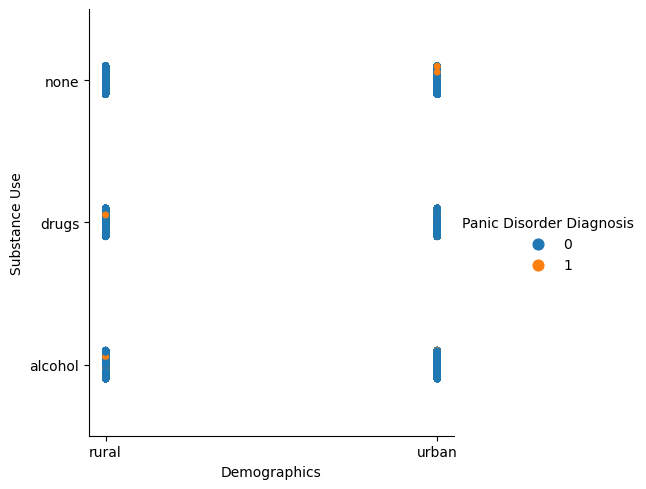

In [44]:
sns.catplot(x='Demographics',y='Substance Use',hue='Panic Disorder Diagnosis',data=data,orient='h')

In [45]:
data.groupby(["Substance Use","Gender"])['Panic Disorder Diagnosis'].mean()

Substance Use  Gender
alcohol        female    0.045879
               male      0.048052
drugs          female    0.045980
               male      0.048231
none           female    0.035414
               male      0.033556
Name: Panic Disorder Diagnosis, dtype: float64

Rural areas have the major chnaces of getting panic disorders

<AxesSubplot:xlabel='Substance Use', ylabel='Panic Disorder Diagnosis'>

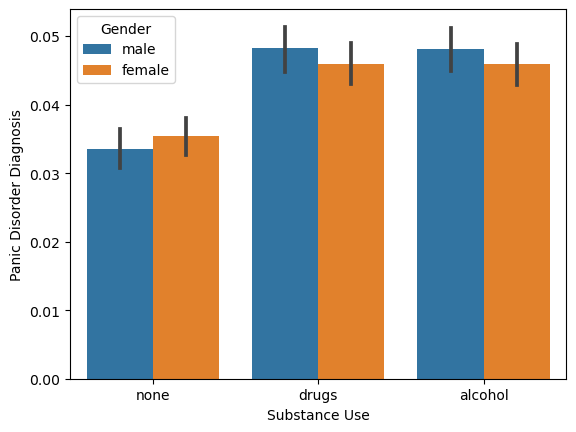

In [46]:
sns.barplot(x="Substance Use",y="Panic Disorder Diagnosis",hue="Gender",data=data)

Panic disoder is mostly occured in men who mostly consumed drugs and alcohol

In [47]:
data.head(2)

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis,Age_group
0,38,male,no,yes,moderate,shortness_of_breath,mild,mild,rural,diabetes,bipolar_disorder,none,socializing,high,sleep_quality,0,20-40
1,51,male,no,no,high,panic_attacks,mild,mild,urban,asthma,anxiety_disorder,drugs,exercise,high,sleep_quality,0,40-60


Panic disorder does not depend on Age

<Figure size 3000x3000 with 0 Axes>

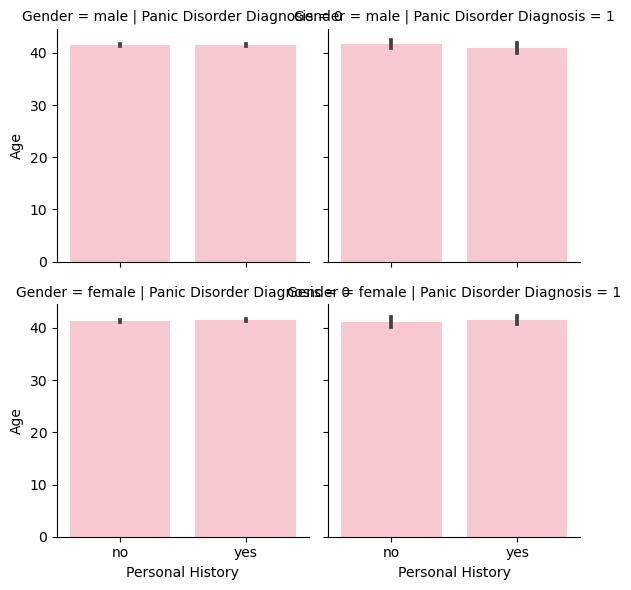

In [48]:
plt.figure(figsize=(30,30))
sm=sns.FacetGrid(data=data,col='Panic Disorder Diagnosis',row='Gender')
sm.map(sns.barplot,'Personal History','Age',color='pink')
plt.show()

In [49]:
data.head()

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis,Age_group
0,38,male,no,yes,moderate,shortness_of_breath,mild,mild,rural,diabetes,bipolar_disorder,none,socializing,high,sleep_quality,0,20-40
1,51,male,no,no,high,panic_attacks,mild,mild,urban,asthma,anxiety_disorder,drugs,exercise,high,sleep_quality,0,40-60
2,32,female,yes,no,high,panic_attacks,mild,significant,urban,diabetes,depressive_disorder,none,seeking_therapy,moderate,exercise,0,20-40
3,64,female,no,no,moderate,chest_pain,moderate,moderate,rural,diabetes,none,none,meditation,high,exercise,0,60-80
4,31,male,yes,no,moderate,panic_attacks,mild,moderate,rural,asthma,none,drugs,seeking_therapy,low,sleep_quality,0,20-40


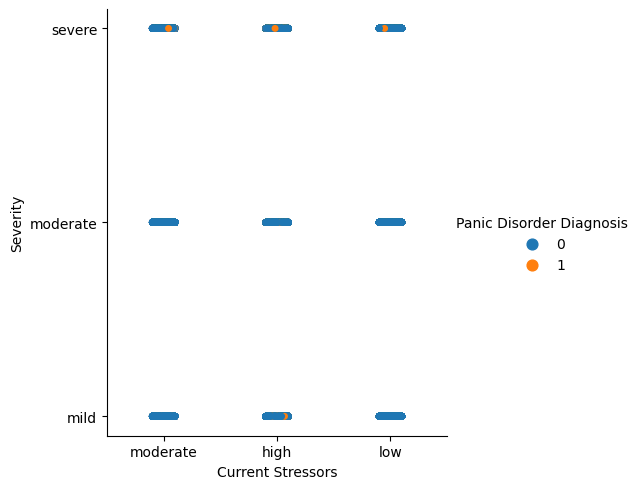

In [50]:
sns.catplot(x='Current Stressors',y='Severity',hue='Panic Disorder Diagnosis',data=data)

**Null Values and Outliers Handling**

In [51]:
data.describe()

,Age,Panic Disorder Diagnosis
count,100000.000000,100000.00000
mean,41.454300,0.04285
std,13.839204,0.20252
min,18.000000,0.00000
25%,29.000000,0.00000
50%,41.000000,0.00000
75%,53.000000,0.00000
max,65.000000,1.00000


In [52]:
data.isnull().sum()

Age                         0
Gender                      0
Family History              0
Personal History            0
Current Stressors           0
Symptoms                    0
Severity                    0
Impact on Life              0
Demographics                0
Medical History             0
Psychiatric History         0
Substance Use               0
Coping Mechanisms           0
Social Support              0
Lifestyle Factors           0
Panic Disorder Diagnosis    0
Age_group                   0
dtype: int64

In [53]:
data.head()

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis,Age_group
0,38,male,no,yes,moderate,shortness_of_breath,mild,mild,rural,diabetes,bipolar_disorder,none,socializing,high,sleep_quality,0,20-40
1,51,male,no,no,high,panic_attacks,mild,mild,urban,asthma,anxiety_disorder,drugs,exercise,high,sleep_quality,0,40-60
2,32,female,yes,no,high,panic_attacks,mild,significant,urban,diabetes,depressive_disorder,none,seeking_therapy,moderate,exercise,0,20-40
3,64,female,no,no,moderate,chest_pain,moderate,moderate,rural,diabetes,none,none,meditation,high,exercise,0,60-80
4,31,male,yes,no,moderate,panic_attacks,mild,moderate,rural,asthma,none,drugs,seeking_therapy,low,sleep_quality,0,20-40


**Data Preprocessing**

In [54]:
data=data.drop(['Age_group'],axis=1)

In [55]:
x=data.drop('Panic Disorder Diagnosis',axis=1)
y=data['Panic Disorder Diagnosis']

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=123)

In [57]:
xtrain.shape,xtest.shape

((75000, 15), (25000, 15))

In [58]:
xtest.head()

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
42083,37,male,no,no,high,panic_attacks,mild,significant,rural,diabetes,bipolar_disorder,drugs,socializing,low,sleep_quality
71825,35,male,yes,yes,low,shortness_of_breath,severe,mild,urban,none,none,alcohol,exercise,high,diet
99535,63,female,yes,yes,high,fear_of_losing_control,severe,significant,rural,asthma,none,none,exercise,moderate,exercise
47879,30,female,no,yes,moderate,dizziness,severe,mild,rural,none,none,drugs,meditation,high,sleep_quality
36734,53,female,yes,yes,high,panic_attacks,moderate,significant,rural,diabetes,depressive_disorder,drugs,socializing,moderate,exercise


In [59]:
def outlier_detect(df):
    for i in df.describe().columns:
        print("Column:",i)
        print("------------------------------------------------")
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        
#         fifth = df[i].quantile(0.05)
#         ninetyfifth = df[i].quantile(0.95)
        
        
        print("Lower Outliers:")
        print()
        lowerout = list(df[df[i]<LTV][i])
        lowerout.sort()
        print(lowerout)
        print()
        # mask method is used to replace the values
        df[i] = df[i].mask(df[i]<LTV, round(LTV,0)) # replacing the outlier with ltv (25% value)
        
        print("Upper Outliers:")
        print()
        upperout = list(df[df[i]>UTV][i])
        upperout.sort()
        print(upperout) 
        print()
        
        # mask method is used to replace the values
        df[i] = df[i].mask(df[i]>UTV, round(UTV,0)) # replacing the outlier with utv (75% value)
    return df

In [60]:
outlier_detect(xtrain)

Column: Age
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]



,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
31450,62,female,yes,yes,high,fear_of_losing_control,moderate,significant,rural,none,none,alcohol,exercise,moderate,diet
42809,24,female,no,yes,low,shortness_of_breath,severe,significant,rural,diabetes,anxiety_disorder,alcohol,socializing,moderate,exercise
52419,38,female,yes,no,low,shortness_of_breath,moderate,moderate,rural,none,anxiety_disorder,drugs,exercise,high,exercise
45663,40,female,no,no,high,shortness_of_breath,mild,mild,urban,heart_disease,anxiety_disorder,none,socializing,moderate,exercise
50696,51,female,no,no,high,panic_attacks,moderate,significant,urban,asthma,anxiety_disorder,alcohol,seeking_therapy,moderate,diet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63206,63,female,no,no,high,panic_attacks,mild,significant,urban,none,depressive_disorder,drugs,exercise,low,exercise
61404,44,female,no,yes,low,dizziness,severe,moderate,rural,none,depressive_disorder,alcohol,socializing,high,diet
17730,39,female,yes,no,moderate,panic_attacks,mild,mild,rural,none,bipolar_disorder,alcohol,meditation,low,sleep_quality
28030,60,male,no,yes,high,chest_pain,moderate,mild,rural,diabetes,none,alcohol,meditation,moderate,diet


In [61]:
outlier_detect(xtest)

Column: Age
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]



,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
42083,37,male,no,no,high,panic_attacks,mild,significant,rural,diabetes,bipolar_disorder,drugs,socializing,low,sleep_quality
71825,35,male,yes,yes,low,shortness_of_breath,severe,mild,urban,none,none,alcohol,exercise,high,diet
99535,63,female,yes,yes,high,fear_of_losing_control,severe,significant,rural,asthma,none,none,exercise,moderate,exercise
47879,30,female,no,yes,moderate,dizziness,severe,mild,rural,none,none,drugs,meditation,high,sleep_quality
36734,53,female,yes,yes,high,panic_attacks,moderate,significant,rural,diabetes,depressive_disorder,drugs,socializing,moderate,exercise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56405,18,male,yes,yes,high,panic_attacks,moderate,significant,urban,diabetes,anxiety_disorder,none,seeking_therapy,low,sleep_quality
50954,41,female,no,no,low,dizziness,mild,moderate,urban,diabetes,anxiety_disorder,alcohol,exercise,moderate,sleep_quality
99121,49,female,yes,yes,high,panic_attacks,severe,significant,urban,none,none,alcohol,seeking_therapy,high,exercise
4170,53,female,yes,yes,low,dizziness,severe,moderate,urban,heart_disease,none,drugs,exercise,moderate,diet


**Replacing Categorical(ordinal data) to nummerical column**

In [62]:
xtrain.replace({'male':1,'female':0,'yes':1,'no':0,'urban':1,'rural':0},inplace=True)
xtest.replace({'male':1,'female':0,'yes':1,'no':0,'urban':1,'rural':0},inplace=True)

In [63]:
xtrain.head()

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
31450,62,0,1,1,high,fear_of_losing_control,moderate,significant,0,none,none,alcohol,exercise,moderate,diet
42809,24,0,0,1,low,shortness_of_breath,severe,significant,0,diabetes,anxiety_disorder,alcohol,socializing,moderate,exercise
52419,38,0,1,0,low,shortness_of_breath,moderate,moderate,0,none,anxiety_disorder,drugs,exercise,high,exercise
45663,40,0,0,0,high,shortness_of_breath,mild,mild,1,heart_disease,anxiety_disorder,none,socializing,moderate,exercise
50696,51,0,0,0,high,panic_attacks,moderate,significant,1,asthma,anxiety_disorder,alcohol,seeking_therapy,moderate,diet


In [64]:
xtest.head()

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
42083,37,1,0,0,high,panic_attacks,mild,significant,0,diabetes,bipolar_disorder,drugs,socializing,low,sleep_quality
71825,35,1,1,1,low,shortness_of_breath,severe,mild,1,none,none,alcohol,exercise,high,diet
99535,63,0,1,1,high,fear_of_losing_control,severe,significant,0,asthma,none,none,exercise,moderate,exercise
47879,30,0,0,1,moderate,dizziness,severe,mild,0,none,none,drugs,meditation,high,sleep_quality
36734,53,0,1,1,high,panic_attacks,moderate,significant,0,diabetes,depressive_disorder,drugs,socializing,moderate,exercise


**Current Stressors**

Xtrain

In [65]:
pd.concat([xtrain,ytrain],axis=1).groupby('Current Stressors')['Panic Disorder Diagnosis'].count()

Current Stressors
high        25105
low         24975
moderate    24920
Name: Panic Disorder Diagnosis, dtype: int64

In [66]:
xtrain['Current Stressors']=xtrain['Current Stressors'].replace({'high':25105,'low':24975,'moderate':24920})

Xtest

In [67]:
pd.concat([xtest,ytest],axis=1).groupby('Current Stressors')['Panic Disorder Diagnosis'].count()

Current Stressors
high        8264
low         8434
moderate    8302
Name: Panic Disorder Diagnosis, dtype: int64

In [68]:
xtest['Current Stressors']=xtest['Current Stressors'].replace({'high':8264,'low':8434,'moderate':8302})

**Severity**


Xtrain

In [69]:
xtrain.head()

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
31450,62,0,1,1,25105,fear_of_losing_control,moderate,significant,0,none,none,alcohol,exercise,moderate,diet
42809,24,0,0,1,24975,shortness_of_breath,severe,significant,0,diabetes,anxiety_disorder,alcohol,socializing,moderate,exercise
52419,38,0,1,0,24975,shortness_of_breath,moderate,moderate,0,none,anxiety_disorder,drugs,exercise,high,exercise
45663,40,0,0,0,25105,shortness_of_breath,mild,mild,1,heart_disease,anxiety_disorder,none,socializing,moderate,exercise
50696,51,0,0,0,25105,panic_attacks,moderate,significant,1,asthma,anxiety_disorder,alcohol,seeking_therapy,moderate,diet


In [70]:
pd.concat([xtrain,ytrain],axis=1).groupby('Severity')['Panic Disorder Diagnosis'].count()

Severity
mild        24886
moderate    24781
severe      25333
Name: Panic Disorder Diagnosis, dtype: int64

In [71]:
xtrain.Severity=xtrain['Severity'].replace({'mild':24886,'moderate':24781,'severe':25333})

Xtest

In [72]:
pd.concat([xtest,ytest],axis=1).groupby('Severity')['Panic Disorder Diagnosis'].count()

Severity
mild        8479
moderate    8344
severe      8177
Name: Panic Disorder Diagnosis, dtype: int64

In [73]:
xtest.Severity=xtest['Severity'].replace({'mild':8479,'moderate':8344,'severe':8177})

**Impact on life**

Xtrain

In [74]:
pd.concat([xtrain,ytrain],axis=1).groupby('Impact on Life')['Panic Disorder Diagnosis'].count()

Impact on Life
mild           25067
moderate       24952
significant    24981
Name: Panic Disorder Diagnosis, dtype: int64

In [75]:
xtrain['Impact on Life']=xtrain['Impact on Life'].replace({'mild':25067,'moderate':24952,'significant':24981})

xtest

In [76]:
pd.concat([xtest,ytest],axis=1).groupby('Impact on Life')['Panic Disorder Diagnosis'].count()

Impact on Life
mild           8385
moderate       8381
significant    8234
Name: Panic Disorder Diagnosis, dtype: int64

In [77]:
xtest['Impact on Life']=xtest['Impact on Life'].replace({'mild':8385,'moderate':8381,'significant':8234})

**Social Support**


Xtrain

In [78]:
pd.concat([xtrain,ytrain],axis=1).groupby('Social Support')['Panic Disorder Diagnosis'].count()

Social Support
high        25034
low         24875
moderate    25091
Name: Panic Disorder Diagnosis, dtype: int64

In [79]:
xtrain['Social Support']=xtrain['Social Support'].replace({'low':24875,'moderate':25091,'high':25034})

Xtest

In [80]:
pd.concat([xtest,ytest],axis=1).groupby('Social Support')['Panic Disorder Diagnosis'].count()

Social Support
high        8419
low         8319
moderate    8262
Name: Panic Disorder Diagnosis, dtype: int64

In [81]:
xtest['Social Support']=xtest['Social Support'].replace({'low':8419,'moderate':8319,'high':8262})

In [82]:
xtrain.head()

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
31450,62,0,1,1,25105,fear_of_losing_control,24781,24981,0,none,none,alcohol,exercise,25091,diet
42809,24,0,0,1,24975,shortness_of_breath,25333,24981,0,diabetes,anxiety_disorder,alcohol,socializing,25091,exercise
52419,38,0,1,0,24975,shortness_of_breath,24781,24952,0,none,anxiety_disorder,drugs,exercise,25034,exercise
45663,40,0,0,0,25105,shortness_of_breath,24886,25067,1,heart_disease,anxiety_disorder,none,socializing,25091,exercise
50696,51,0,0,0,25105,panic_attacks,24781,24981,1,asthma,anxiety_disorder,alcohol,seeking_therapy,25091,diet


**Converting Categorical(nominal) colummn into numerical by using ohe hot encoder**

OneHotEnconding

In [83]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(handle_unknown="ignore",sparse=True,drop='first')

In [84]:
ohedata = ohe.fit_transform(xtrain.select_dtypes('object')).toarray()

In [85]:
# Converting the one hot data to a data frame with col names

ohedata_train = pd.DataFrame(ohedata, columns = ohe.get_feature_names_out())

In [86]:
xtrain = pd.concat([xtrain.drop(['Symptoms','Medical History','Psychiatric History','Substance Use','Coping Mechanisms','Lifestyle Factors'], axis = 1).reset_index(drop=True), ohedata_train], axis = 1)

Xtest

In [87]:
ohedata_test = ohe.fit_transform(xtest.select_dtypes('object')).toarray()

In [88]:
# Converting the one hot data to a data frame with col names

ohedata_test = pd.DataFrame(ohedata_test, columns = ohe.get_feature_names_out())

In [89]:
xtest = pd.concat([xtest.drop(['Symptoms','Medical History','Psychiatric History','Substance Use','Coping Mechanisms','Lifestyle Factors'], axis = 1).reset_index(drop=True), ohedata_test], axis = 1)

In [90]:
xtrain.dtypes

Age                                          int64
Gender                                       int64
Family History                               int64
Personal History                             int64
Current Stressors                            int64
Severity                                     int64
Impact on Life                               int64
Demographics                                 int64
Social Support                               int64
Symptoms_dizziness                         float64
Symptoms_fear_of_losing_control            float64
Symptoms_panic_attacks                     float64
Symptoms_shortness_of_breath               float64
Medical History_diabetes                   float64
Medical History_heart_disease              float64
Medical History_none                       float64
Psychiatric History_bipolar_disorder       float64
Psychiatric History_depressive_disorder    float64
Psychiatric History_none                   float64
Substance Use_drugs            

In [91]:
xtest.dtypes

Age                                          int64
Gender                                       int64
Family History                               int64
Personal History                             int64
Current Stressors                            int64
Severity                                     int64
Impact on Life                               int64
Demographics                                 int64
Social Support                               int64
Symptoms_dizziness                         float64
Symptoms_fear_of_losing_control            float64
Symptoms_panic_attacks                     float64
Symptoms_shortness_of_breath               float64
Medical History_diabetes                   float64
Medical History_heart_disease              float64
Medical History_none                       float64
Psychiatric History_bipolar_disorder       float64
Psychiatric History_depressive_disorder    float64
Psychiatric History_none                   float64
Substance Use_drugs            

**Scaling**

**Scaling Numeric Data (if necessary)**

We need to apply scaling for the input numerical continuous columns which are in different scales only ,not to the one hot encoded vectors

Whenever we apply data for linear models we will can go with scaling part

* We have two scales
    - Standard Scale
    - Min Max Scale

In [92]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [93]:
xtrain.head()

,Age,Gender,Family History,Personal History,Current Stressors,Severity,Impact on Life,Demographics,Social Support,Symptoms_dizziness,...,Psychiatric History_bipolar_disorder,Psychiatric History_depressive_disorder,Psychiatric History_none,Substance Use_drugs,Substance Use_none,Coping Mechanisms_meditation,Coping Mechanisms_seeking_therapy,Coping Mechanisms_socializing,Lifestyle Factors_exercise,Lifestyle Factors_sleep_quality
0,62,0,1,1,25105,24781,24981,0,25091,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,0,0,1,24975,25333,24981,0,25091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,38,0,1,0,24975,24781,24952,0,25034,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,0,0,0,25105,24886,25067,1,25091,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,51,0,0,0,25105,24781,24981,1,25091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [94]:
xtrain.dtypes

Age                                          int64
Gender                                       int64
Family History                               int64
Personal History                             int64
Current Stressors                            int64
Severity                                     int64
Impact on Life                               int64
Demographics                                 int64
Social Support                               int64
Symptoms_dizziness                         float64
Symptoms_fear_of_losing_control            float64
Symptoms_panic_attacks                     float64
Symptoms_shortness_of_breath               float64
Medical History_diabetes                   float64
Medical History_heart_disease              float64
Medical History_none                       float64
Psychiatric History_bipolar_disorder       float64
Psychiatric History_depressive_disorder    float64
Psychiatric History_none                   float64
Substance Use_drugs            

In [95]:
# Fit on train

xtrain.iloc[:,[0,4,5,6,8]] = sc.fit_transform(xtrain.iloc[:,[0,4,5,6,8]])

# Transform on test

xtest.iloc[:,[0,4,5,6,8]] = sc.fit_transform(xtest.iloc[:,[0,4,5,6,8]])

In [96]:
xtrain.head()

,Age,Gender,Family History,Personal History,Current Stressors,Severity,Impact on Life,Demographics,Social Support,Symptoms_dizziness,...,Psychiatric History_bipolar_disorder,Psychiatric History_depressive_disorder,Psychiatric History_none,Substance Use_drugs,Substance Use_none,Coping Mechanisms_meditation,Coping Mechanisms_seeking_therapy,Coping Mechanisms_socializing,Lifestyle Factors_exercise,Lifestyle Factors_sleep_quality
0,1.482806,0,1,1,1.349627,-0.921973,-0.390835,0,0.992892,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.264320,0,0,1,-0.325179,1.377842,-0.390835,0,0.992892,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.252221,0,1,0,-0.325179,-0.921973,-0.984392,0,0.368678,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.107635,0,0,0,1.349627,-0.484508,1.369369,1,0.992892,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.687585,0,0,0,1.349627,-0.921973,-0.390835,1,0.992892,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [97]:
xtest.head()

,Age,Gender,Family History,Personal History,Current Stressors,Severity,Impact on Life,Demographics,Social Support,Symptoms_dizziness,...,Psychiatric History_bipolar_disorder,Psychiatric History_depressive_disorder,Psychiatric History_none,Substance Use_drugs,Substance Use_none,Coping Mechanisms_meditation,Coping Mechanisms_seeking_therapy,Coping Mechanisms_socializing,Lifestyle Factors_exercise,Lifestyle Factors_sleep_quality
0,-0.313937,1,0,0,-0.958102,1.165702,-1.426562,0,1.322075,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.458257,1,1,1,1.369706,-1.281825,0.729149,1,-1.093747,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.562224,0,1,1,-0.958102,-1.281825,-1.426562,0,-0.216665,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.819057,0,0,1,-0.437768,-1.281825,0.729149,0,-1.093747,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.840624,0,1,1,-0.958102,0.071608,-1.426562,0,-0.216665,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [99]:
# Model Define

log = LogisticRegression()

knn = KNeighborsClassifier(n_neighbors=5, p=2)

# Here neighbors are the hyperparameter
# Distance is the another hyperparameter (p) 2 for euclidean distance

dt = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# criteria is the root node selection method
# max_depth is the number of subtrees in decision  tree - main Hyperparameter

rf = RandomForestClassifier(n_estimators = 2, max_depth = 2, criterion = 'entropy', bootstrap = True)

# n_estimators are number of decision trees - Hyper parameter


sv = SVC(kernel = 'rbf', gamma=5) # for a non-linear seperable data

# Gamma=Sigma=coeffient for the rbf kernel - hyperparameter

#Kernel linear-- Linear SVM

#sv = SVC(kernel="linear") # for a linear separable data

nb = GaussianNB()

xgb = XGBClassifier(n_estimators=10,reg_alpha=0.5)

**5.8 Model Training**

* Using xtrain, ytrain data
* Using fit command to train the defined model with xtrain, ytrain

#### Logistic Regression

It uses the Linear Regression line to convert it into a sigmoid curve with the logit function output as probability of class

    prob = 1/1+e^-y
    
    if prob>0.5 1 
    else 0

Learning/Training Model on train data

we can use fit function in model for xtrain and ytrain data to train our data for getting the line co-efficients



In [100]:
log.fit(xtrain, ytrain)

LogisticRegression()

In [101]:
log.intercept_

array([-12.8113419])

In [102]:
log.coef_

array([[-2.16562916e-02,  3.81877100e-02,  1.24454667e+00,
         1.18896857e+00,  1.29017260e+00,  8.85954180e-01,
        -3.14974059e-01, -5.47220316e-01, -2.62841349e-01,
         1.21914654e-02, -6.97243768e-02,  2.00182903e+00,
         7.08836329e-02,  2.71451144e-02,  1.81545461e-02,
        -1.10933721e+00, -4.90737860e-02, -9.88799394e-02,
        -8.13885919e-01,  6.14692206e-03, -5.55258196e-01,
         1.76177644e+00,  1.84814675e+00,  1.76811157e+00,
        -1.46757355e+00,  7.54044891e+00]])

KNN
Knearest Neighbors

It will take the nearest data points using euclidean distance metric with number of k given

It is a lazy algorithm , it wont train the data instead it will store the data

It will do the training when test data given

In [103]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [104]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**Decision Tree**

Logic Tree based predictions based on root and interior nodes, branches

In [105]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

**Feature Importance**

In [106]:
pd.DataFrame(index = dt.feature_names_in_,data = dt.feature_importances_, columns = ['FeatureImportance'])

,FeatureImportance
Age,0.000000
Gender,0.000000
Family History,0.000000
Personal History,0.000000
Current Stressors,0.167676
Severity,0.064500
Impact on Life,0.000000
Demographics,0.000000
Social Support,0.000000
Symptoms_dizziness,0.000000


**Tree**

In [107]:
from sklearn.tree import plot_tree

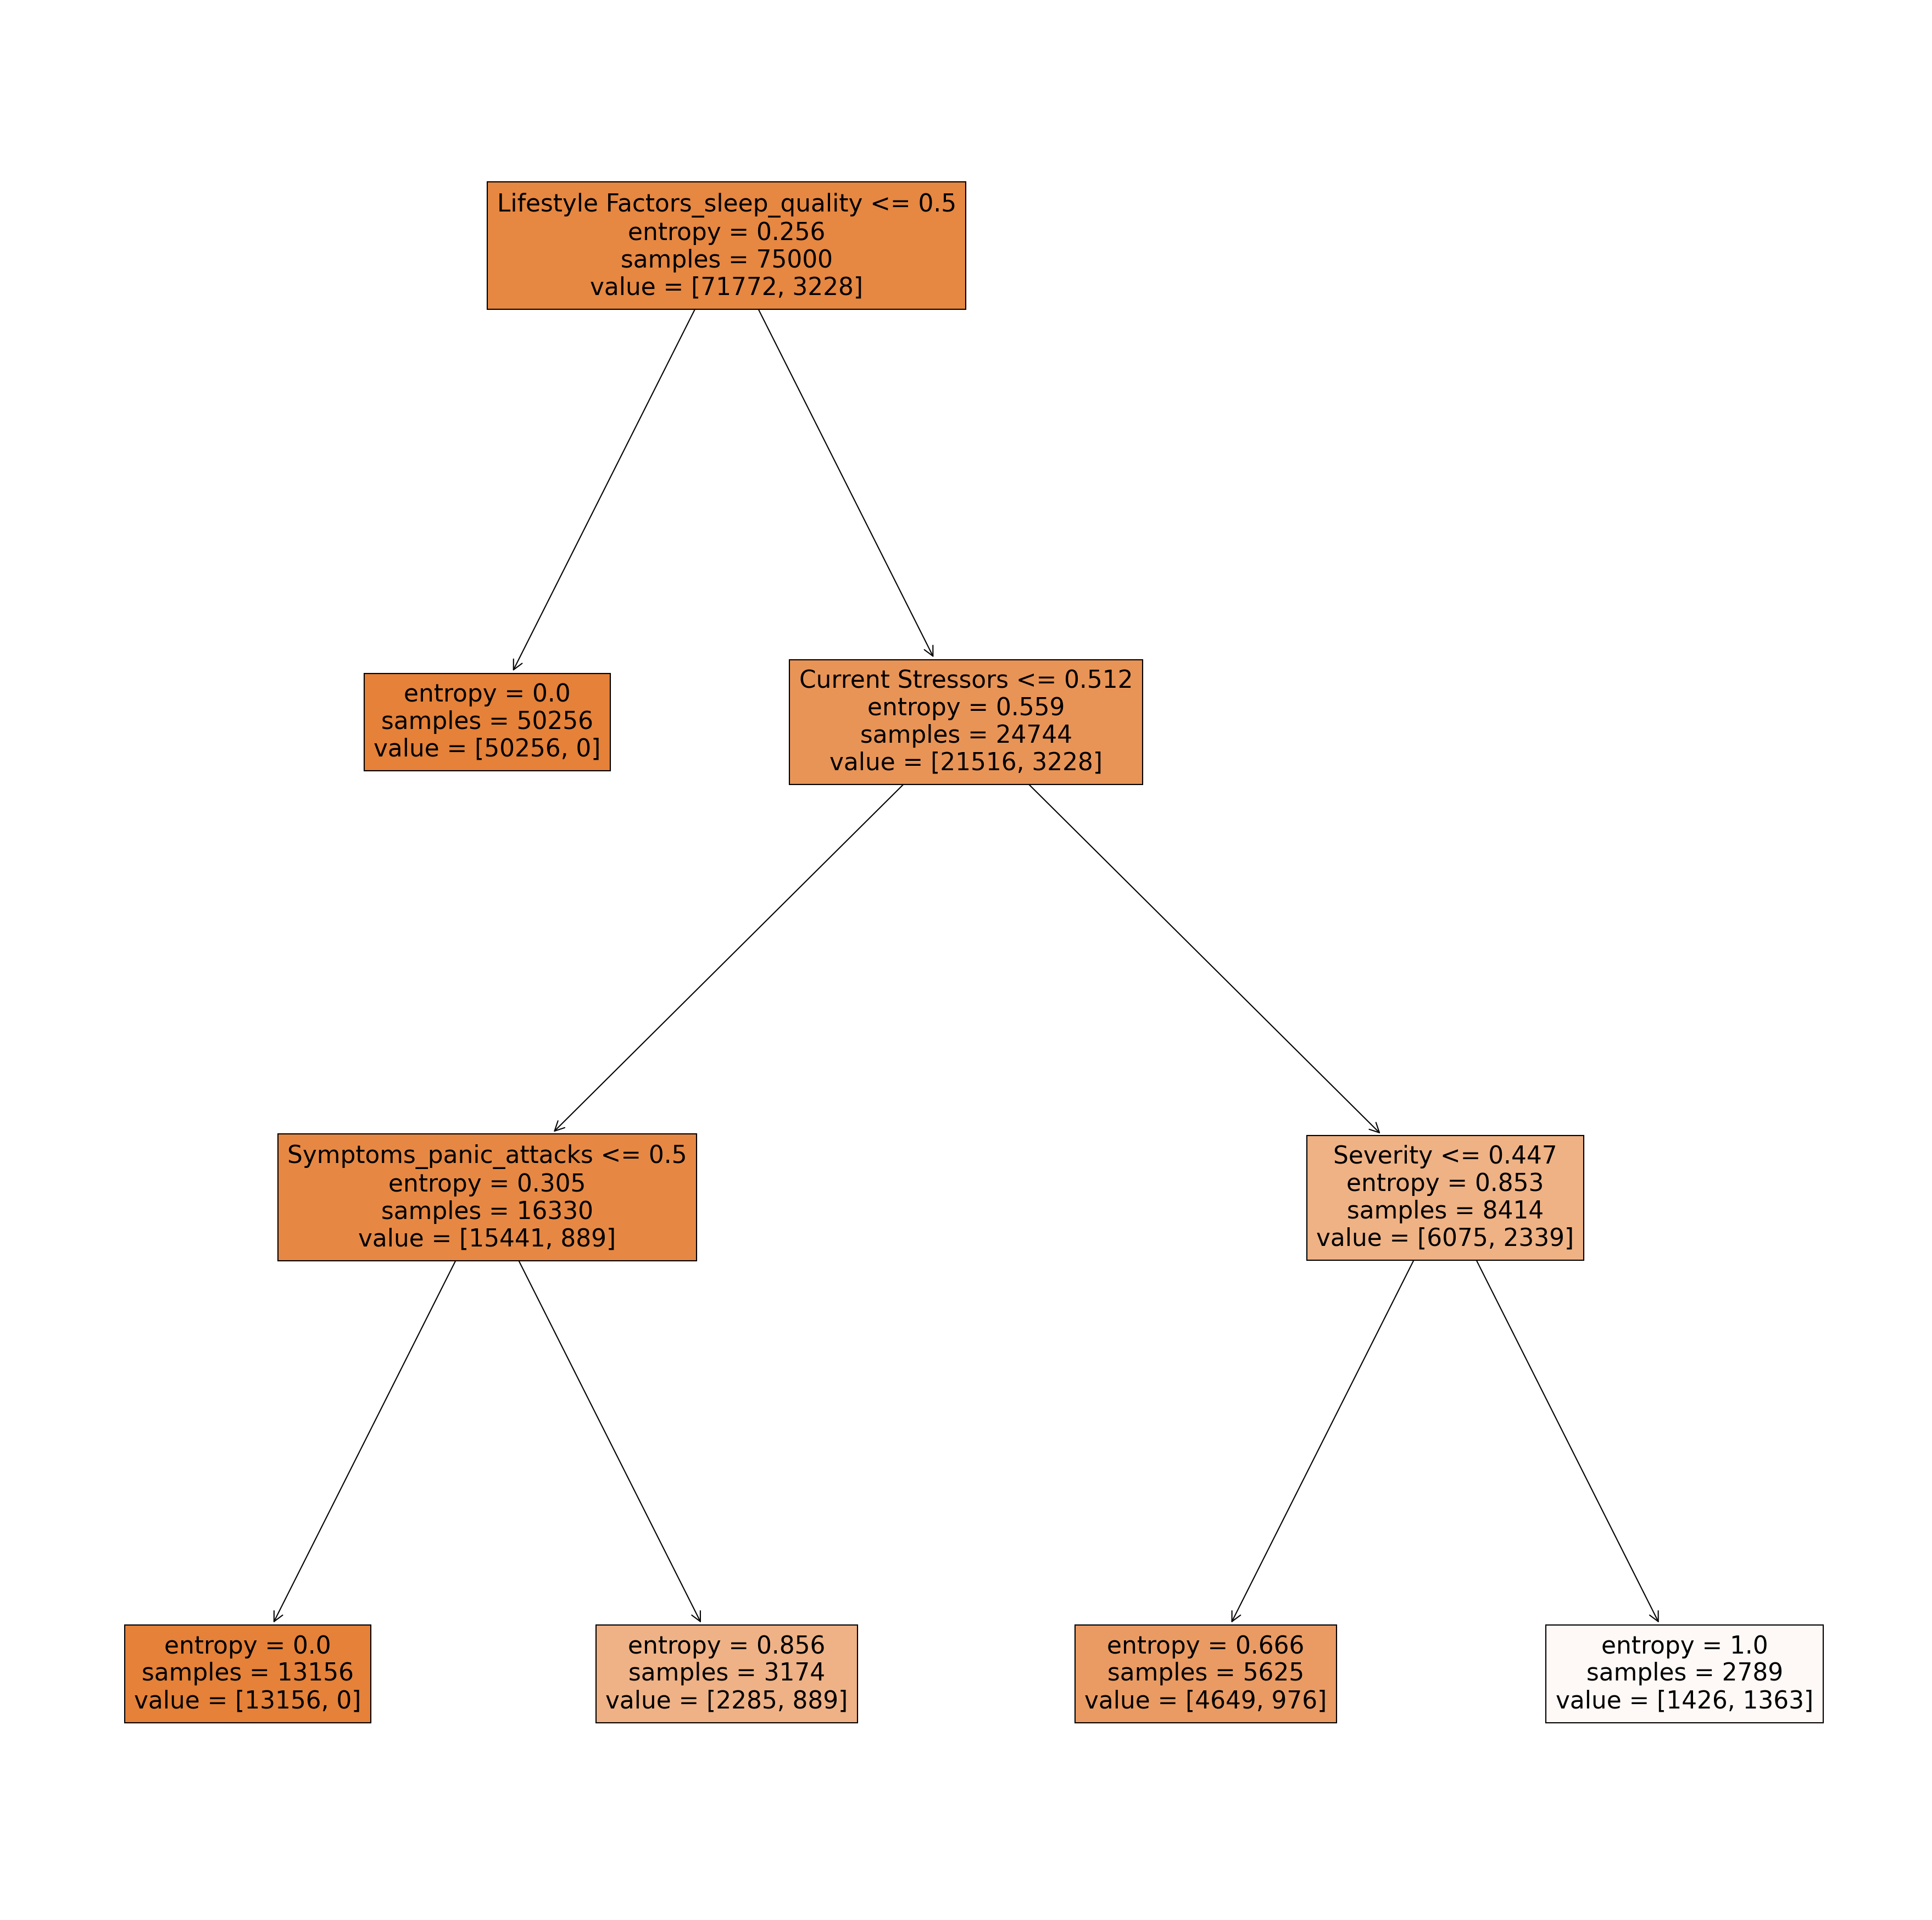

In [108]:
plt.figure(figsize = (30,30), dpi = 150)
plot_tree(dt,filled = True, feature_names=xtrain.columns)
plt.show()

**Random Forest**


Bagging algorithm which was a combination of Multiple Decision Trees

In [109]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=2)

In [110]:
pd.DataFrame(index = rf.feature_names_in_,data = rf.feature_importances_, columns = ['FeatureImportance'])

,FeatureImportance
Age,0.000000
Gender,0.000000
Family History,0.000000
Personal History,0.000000
Current Stressors,0.064304
Severity,0.000000
Impact on Life,0.548101
Demographics,0.000000
Social Support,0.000000
Symptoms_dizziness,0.000000


Tree

In [111]:
rf.estimators_

[DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='auto',
                        random_state=1564506528),
 DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='auto',
                        random_state=603520685)]

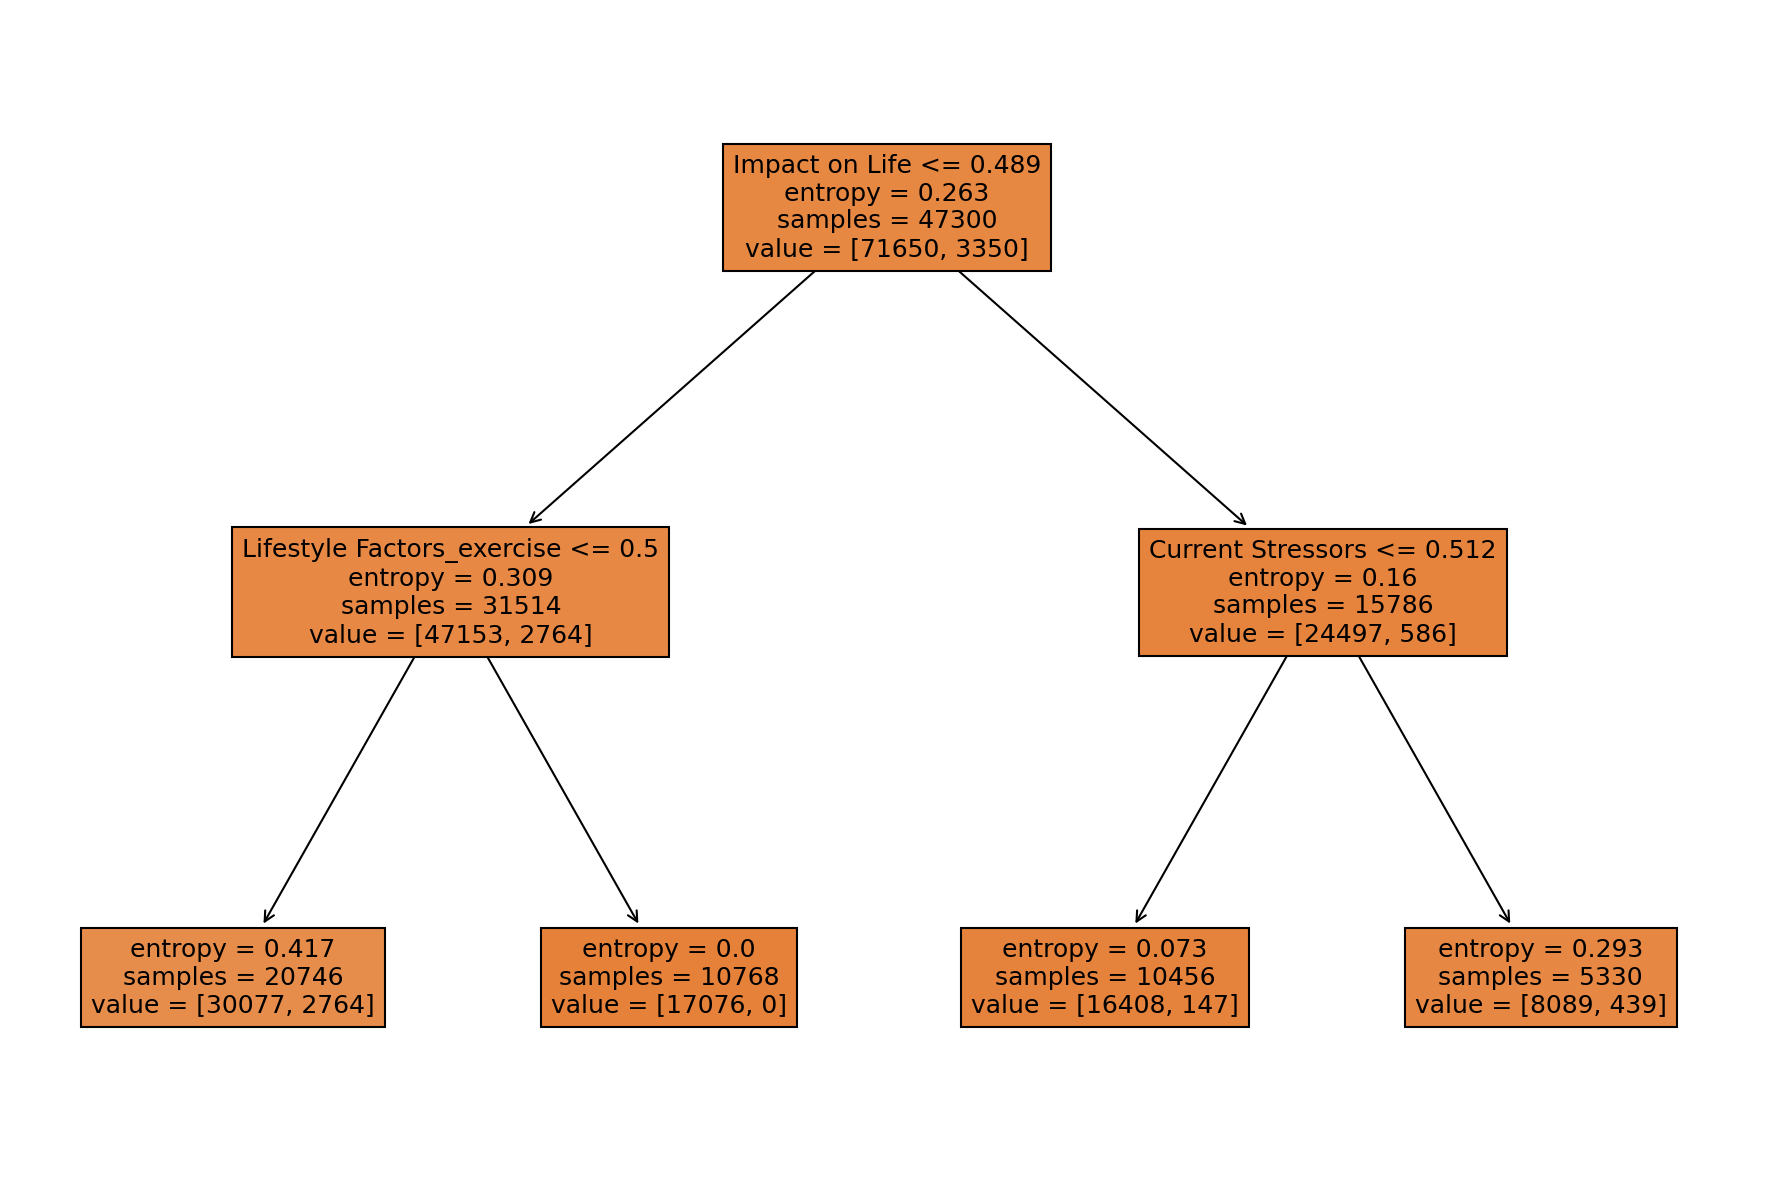

In [112]:
plt.figure(figsize = (15,10),dpi = 150)
plot_tree(rf.estimators_[1],filled = True, feature_names=xtrain.columns)
plt.show()

#### SVM (Time Taking for Higher Dimensional Data)

Support vectors (Data Points taken to Identify Maximal Margin Classifier) - for linear data

for non-linear data kernel trick is used to divide classes - rbf , poly

#### Naive Bayes

Naive Bayes works on Bayesian Probability formula

In [113]:
nb.fit(xtrain, ytrain)

GaussianNB()

#### Xgboost

Boosting Algorithm where for the selected number of models , one model error will be trained by another model

we need to install xgboost, using anaconda prompt - pip install xgboost

In [114]:
xgb = XGBClassifier(n_estimators=10,reg_alpha=0.5)

In [115]:
ytrain_xg = np.where(ytrain == 'yes',1,0)

In [116]:
xgb.fit(xtrain,ytrain_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

**5.9 Models Performance**

* Checking Trained Model Performances on Test Data

* Using x_test data we will be getting predictions, these predictions will be compared to y_test

* To check Model Performance we can use evaluation methods

    * Error/Loss
    * Model Score 
    * Bias-Variance Trade off (Underfit or Overfit)
    * Cross-Val Score

For classification we can use these evaluation


Performance Metric | Classification
-------|-----------
**Loss or Error**|**Confusion Matrix (Number of right/wrong predictions)**
**Model Score (Evaluation)** | **Accuracy Score (Balanced Data) , F1-Score/Auc-Roc Score (For Imbalanced Data)**
**Bias-Variance Trade Off**|Higher error & Lower score (underfit)
|Low Train error & High Test error (Overfit)
**Cross-Val Score**|Checking trained model performance on entire X and y data

As we have imbalanced data considering auc-roc score for better understanding model

In [117]:
# Modules for Metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score

In [118]:
names = ['LogisticRegression', 'Decision Tree', 'Random Forest','NB','Xgboost']

models = [log, dt, rf, nb, xgb]

# KNN & SVM will take more time

Model: LogisticRegression

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     23943
           1       0.21      0.13      0.16      1057

    accuracy                           0.94     25000
   macro avg       0.59      0.56      0.57     25000
weighted avg       0.93      0.94      0.94     25000

Confusion_Matrix:


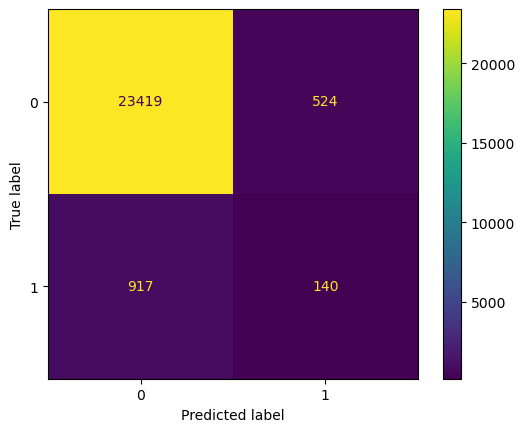

AUC-ROC:


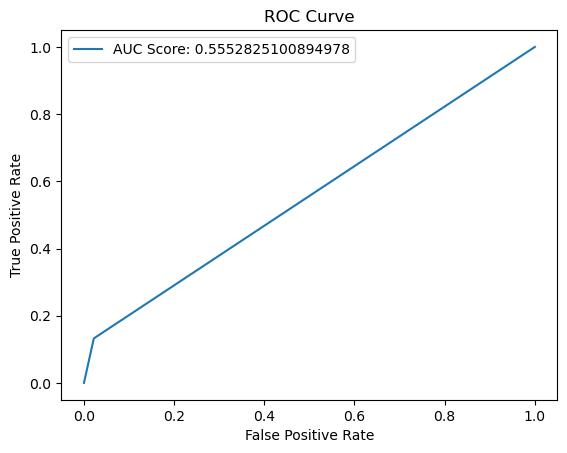

-----------------------------------------------------------------------------------
Model: Decision Tree

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     23943
           1       0.00      0.00      0.00      1057

    accuracy                           0.96     25000
   macro avg       0.48      0.50      0.49     25000
weighted avg       0.92      0.96      0.94     25000

Confusion_Matrix:


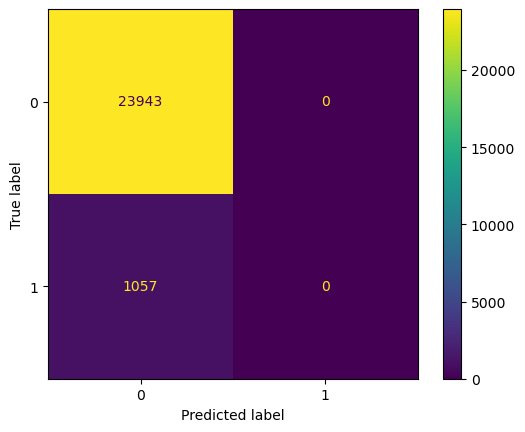

AUC-ROC:


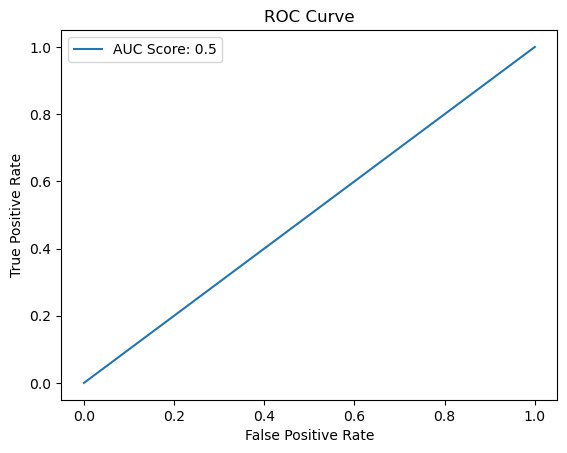

-----------------------------------------------------------------------------------
Model: Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     23943
           1       0.00      0.00      0.00      1057

    accuracy                           0.96     25000
   macro avg       0.48      0.50      0.49     25000
weighted avg       0.92      0.96      0.94     25000

Confusion_Matrix:


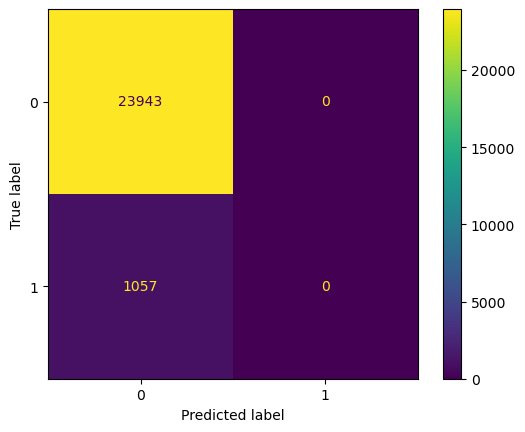

AUC-ROC:


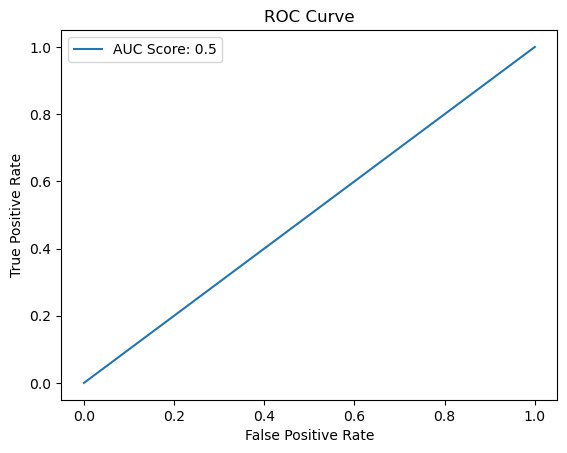

-----------------------------------------------------------------------------------
Model: NB

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82     23943
           1       0.13      1.00      0.23      1057

    accuracy                           0.71     25000
   macro avg       0.56      0.85      0.52     25000
weighted avg       0.96      0.71      0.80     25000

Confusion_Matrix:


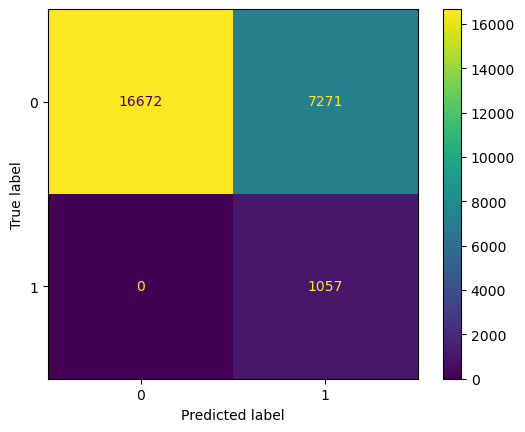

AUC-ROC:


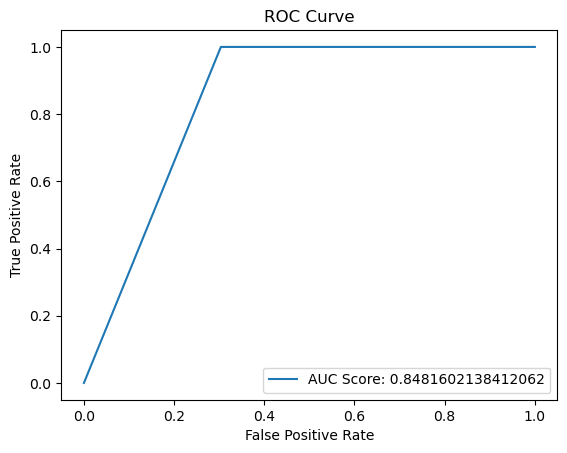

-----------------------------------------------------------------------------------
Model: Xgboost

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     23943
           1       0.00      0.00      0.00      1057

    accuracy                           0.96     25000
   macro avg       0.48      0.50      0.49     25000
weighted avg       0.92      0.96      0.94     25000

Confusion_Matrix:


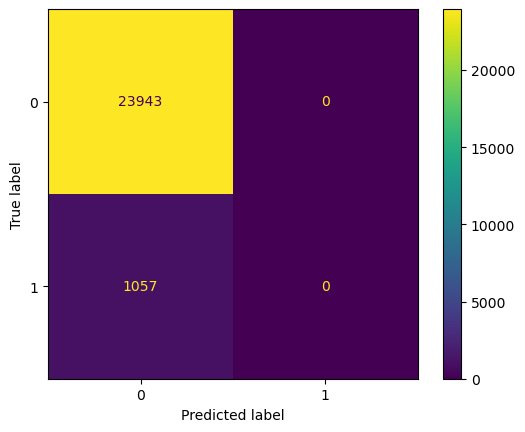

AUC-ROC:


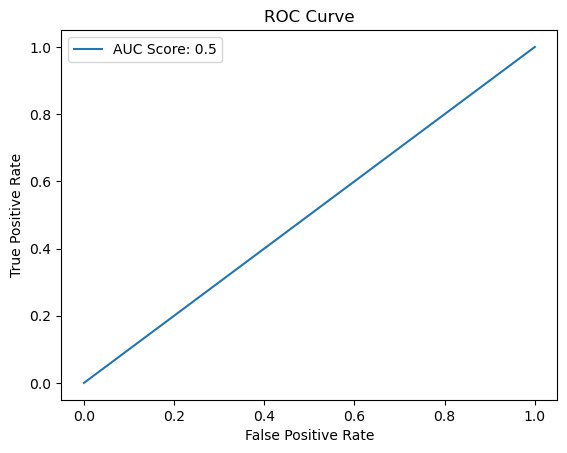

-----------------------------------------------------------------------------------


In [119]:
for i in range(len(models)):
    print(green("Model: {}\n".format(names[i]),['bold']))
    if models[i] == xgb:
        ytest_pred = models[i].predict(xtest)
        print("Classification Report:\n",classification_report(ytest, ytest_pred))
        print(blue("Confusion_Matrix:",['bold']))
        plt.show(plot_confusion_matrix(models[i], xtest, ytest))
        print(red("AUC-ROC:",['bold']))
        fpr, tpr, threshold = roc_curve(ytest, ytest_pred)
        auc_score = auc(fpr, tpr)
        auc_str = "AUC Score: "+ str(auc_score)
        plt.plot(fpr,tpr,label=auc_str)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()
        print("-----------------------------------------------------------------------------------")
    else:
        ytest_pred = models[i].predict(xtest)
        print("Classification Report:\n",classification_report(ytest, ytest_pred))
        print(blue("Confusion_Matrix:",['bold']))
        plt.show(plot_confusion_matrix(models[i], xtest, ytest))
        print(red("AUC-ROC:",['bold']))
        fpr, tpr, threshold = roc_curve(ytest, ytest_pred)
        auc_score = auc(fpr, tpr)
        auc_str = "AUC Score: "+ str(auc_score)
        plt.plot(fpr,tpr,label=auc_str)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()
        print("-----------------------------------------------------------------------------------")

* **Navie Bayes** has shown best results among all the models.

In [120]:
data.head()

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,38,male,no,yes,moderate,shortness_of_breath,mild,mild,rural,diabetes,bipolar_disorder,none,socializing,high,sleep_quality,0
1,51,male,no,no,high,panic_attacks,mild,mild,urban,asthma,anxiety_disorder,drugs,exercise,high,sleep_quality,0
2,32,female,yes,no,high,panic_attacks,mild,significant,urban,diabetes,depressive_disorder,none,seeking_therapy,moderate,exercise,0
3,64,female,no,no,moderate,chest_pain,moderate,moderate,rural,diabetes,none,none,meditation,high,exercise,0
4,31,male,yes,no,moderate,panic_attacks,mild,moderate,rural,asthma,none,drugs,seeking_therapy,low,sleep_quality,0


**Real Time Prediction**

In [129]:
def predict_panicdisorder(data):
    
    from IPython.display import display
    
    rdata = pd.DataFrame([data], columns = ['Age', 'Gender', 'Family History', 'Personal History', 
                                           'Current Stressors','Symptoms', 'Severity', 
                                           'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History',
                                           'Substance Use', 'Coping Mechanisms', 'Social Support', 
                                           'Lifestyle Factors'])
    
    print("Person Details:")
    display(rdata.head())
    print()
    
    data = rdata
    
    data.replace({'no':0,'yes':1,'male':1,'female':0,'urban':1,'rural':0}, inplace = True)
    data['Current Stressors'].replace({'high':25105,'low':24975,'moderate':24920}, inplace = True)
    data['Severity'].replace({'mild':24886,'moderate':24781,'severe':25333},inplace=True)
    data['Impact on Life'].replace({'mild':25067,'moderate':24952,'significant':24981},inplace=True)
    data['Social Support'].replace({"high":25034,'low':24875,'moderate':25091},inplace=True)
    
    ohedata_test = ohe.transform(data.select_dtypes('object')).toarray()
    
    # Converting the one hot data to a data frame with col names

    ohedata_test = pd.DataFrame(ohedata_test, columns = ohe.get_feature_names_out())

    data = pd.concat([data.drop(['Symptoms','Medical History','Psychiatric History','Substance Use','Coping Mechanisms','Lifestyle Factors'], axis = 1).reset_index(drop=True), ohedata_test.reset_index(drop=True)], axis = 1)
    
    data.iloc[:,[0,4,5,6,8]] = sc.transform(data.iloc[:,[0,4,5,6,8]])
    
    result = nb.predict(data)[0]
    
    print("Panic Disorder (Prediction): ", result)
    print("============================================================")
    print()
    
#     return result


In [130]:
sampledata = x.dropna().sample(50).reset_index(drop=True)

In [131]:
sampledata.head()

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
0,45,female,yes,no,moderate,fear_of_losing_control,mild,moderate,rural,heart_disease,anxiety_disorder,alcohol,seeking_therapy,moderate,exercise
1,39,female,yes,yes,moderate,chest_pain,moderate,significant,urban,diabetes,depressive_disorder,none,meditation,low,sleep_quality
2,54,female,yes,no,moderate,chest_pain,mild,significant,urban,asthma,anxiety_disorder,alcohol,exercise,high,diet
3,29,female,no,yes,moderate,panic_attacks,severe,significant,rural,diabetes,anxiety_disorder,alcohol,socializing,low,diet
4,18,female,no,yes,low,chest_pain,moderate,moderate,urban,none,depressive_disorder,drugs,seeking_therapy,high,exercise


In [132]:
for _, row in sampledata.iterrows():
    predict_panicdisorder(row)

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
0,45,female,yes,no,moderate,fear_of_losing_control,mild,moderate,rural,heart_disease,anxiety_disorder,alcohol,seeking_therapy,moderate,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
1,39,female,yes,yes,moderate,chest_pain,moderate,significant,urban,diabetes,depressive_disorder,none,meditation,low,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
2,54,female,yes,no,moderate,chest_pain,mild,significant,urban,asthma,anxiety_disorder,alcohol,exercise,high,diet



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
3,29,female,no,yes,moderate,panic_attacks,severe,significant,rural,diabetes,anxiety_disorder,alcohol,socializing,low,diet



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
4,18,female,no,yes,low,chest_pain,moderate,moderate,urban,none,depressive_disorder,drugs,seeking_therapy,high,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
5,63,male,no,no,moderate,fear_of_losing_control,moderate,significant,urban,diabetes,depressive_disorder,alcohol,meditation,low,diet



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
6,21,female,no,yes,moderate,shortness_of_breath,mild,mild,rural,asthma,depressive_disorder,alcohol,meditation,moderate,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
7,26,male,yes,yes,high,panic_attacks,mild,significant,rural,none,anxiety_disorder,none,exercise,moderate,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
8,28,male,yes,yes,high,fear_of_losing_control,mild,mild,rural,asthma,bipolar_disorder,alcohol,seeking_therapy,high,diet



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
9,42,female,yes,yes,high,fear_of_losing_control,severe,mild,urban,asthma,depressive_disorder,drugs,exercise,high,diet



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
10,19,male,yes,yes,moderate,dizziness,mild,significant,urban,asthma,none,none,seeking_therapy,low,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
11,61,male,yes,yes,moderate,dizziness,severe,mild,rural,asthma,none,alcohol,socializing,moderate,diet



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
12,23,female,no,no,moderate,dizziness,mild,mild,rural,heart_disease,anxiety_disorder,drugs,meditation,low,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
13,45,female,yes,yes,low,panic_attacks,mild,mild,rural,diabetes,none,alcohol,seeking_therapy,low,diet



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
14,58,female,yes,no,moderate,fear_of_losing_control,moderate,significant,urban,heart_disease,depressive_disorder,alcohol,exercise,low,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
15,59,female,no,yes,moderate,panic_attacks,mild,mild,urban,heart_disease,bipolar_disorder,drugs,socializing,moderate,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
16,22,female,no,yes,low,dizziness,moderate,moderate,urban,asthma,depressive_disorder,none,exercise,high,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
17,40,male,no,no,moderate,shortness_of_breath,mild,moderate,urban,diabetes,anxiety_disorder,drugs,exercise,low,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
18,20,female,no,yes,low,panic_attacks,mild,significant,urban,heart_disease,bipolar_disorder,alcohol,exercise,moderate,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
19,37,male,no,no,high,panic_attacks,mild,moderate,urban,heart_disease,bipolar_disorder,none,exercise,moderate,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
20,23,male,yes,no,high,shortness_of_breath,mild,significant,urban,none,anxiety_disorder,alcohol,socializing,low,diet



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
21,29,male,no,no,high,panic_attacks,moderate,moderate,urban,heart_disease,depressive_disorder,alcohol,exercise,high,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
22,19,female,yes,no,low,chest_pain,mild,moderate,urban,asthma,bipolar_disorder,drugs,exercise,moderate,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
23,21,male,yes,yes,moderate,fear_of_losing_control,moderate,significant,urban,diabetes,depressive_disorder,none,exercise,low,diet



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
24,25,female,no,no,moderate,chest_pain,moderate,mild,rural,diabetes,bipolar_disorder,alcohol,socializing,high,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
25,23,female,yes,yes,high,chest_pain,moderate,significant,urban,diabetes,anxiety_disorder,none,exercise,moderate,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
26,65,male,no,yes,moderate,dizziness,severe,significant,urban,asthma,bipolar_disorder,drugs,exercise,low,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
27,36,female,yes,yes,moderate,dizziness,moderate,significant,urban,asthma,anxiety_disorder,alcohol,seeking_therapy,moderate,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
28,62,male,no,no,high,shortness_of_breath,moderate,mild,rural,asthma,none,drugs,exercise,high,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
29,32,male,no,yes,moderate,fear_of_losing_control,moderate,moderate,rural,heart_disease,bipolar_disorder,drugs,seeking_therapy,high,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
30,54,female,no,yes,high,panic_attacks,moderate,significant,urban,diabetes,anxiety_disorder,none,exercise,moderate,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
31,35,male,yes,yes,moderate,dizziness,mild,significant,rural,diabetes,depressive_disorder,none,seeking_therapy,moderate,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
32,20,male,no,yes,high,fear_of_losing_control,mild,moderate,urban,none,depressive_disorder,drugs,meditation,moderate,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
33,38,female,no,yes,low,dizziness,moderate,moderate,rural,diabetes,anxiety_disorder,alcohol,exercise,moderate,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
34,49,female,yes,yes,high,chest_pain,mild,moderate,rural,none,anxiety_disorder,alcohol,meditation,high,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
35,21,female,yes,no,low,panic_attacks,moderate,mild,urban,diabetes,none,drugs,seeking_therapy,moderate,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
36,24,male,yes,yes,moderate,chest_pain,mild,moderate,rural,heart_disease,none,alcohol,exercise,high,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
37,64,male,yes,yes,moderate,fear_of_losing_control,severe,moderate,urban,none,bipolar_disorder,none,exercise,low,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
38,49,female,no,no,low,fear_of_losing_control,severe,moderate,urban,none,none,drugs,seeking_therapy,high,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
39,42,male,yes,no,moderate,panic_attacks,moderate,mild,rural,none,bipolar_disorder,none,meditation,high,diet



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
40,52,male,yes,yes,low,panic_attacks,moderate,significant,rural,none,anxiety_disorder,drugs,socializing,high,diet



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
41,57,female,no,yes,low,dizziness,severe,moderate,rural,none,none,drugs,meditation,low,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
42,60,male,yes,yes,low,fear_of_losing_control,moderate,significant,rural,diabetes,depressive_disorder,drugs,socializing,moderate,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
43,41,male,yes,yes,high,panic_attacks,severe,significant,rural,diabetes,bipolar_disorder,alcohol,socializing,high,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
44,54,male,no,yes,moderate,fear_of_losing_control,severe,mild,rural,diabetes,depressive_disorder,none,seeking_therapy,moderate,diet



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
45,65,male,no,no,high,panic_attacks,moderate,mild,rural,diabetes,anxiety_disorder,none,seeking_therapy,low,exercise



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
46,46,male,yes,yes,high,shortness_of_breath,severe,significant,urban,none,none,alcohol,meditation,low,diet



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
47,21,female,no,no,high,fear_of_losing_control,moderate,significant,rural,heart_disease,none,none,exercise,moderate,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
48,20,female,yes,no,moderate,dizziness,severe,moderate,rural,none,anxiety_disorder,drugs,exercise,low,sleep_quality



Panic Disorder (Prediction):  0

Person Details:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
49,58,female,yes,yes,high,fear_of_losing_control,moderate,significant,urban,asthma,none,drugs,socializing,low,diet



Panic Disorder (Prediction):  0

